## Background and Context

You are a Data Scientist for a tourism company named "Visit with us". The Policy Maker of the company wants to enable and establish a viable business model to expand the customer base.

A viable business model is a central concept that helps you to understand the existing ways of doing the business and how to change the ways for the benefit of the tourism sector.

One of the ways to expand the customer base is to introduce a new offering of packages.

Currently, there are 5 types of packages the company is offering - Basic, Standard, Deluxe, Super Deluxe, King. Looking at the data of the last year, we observed that 18% of the customers purchased the packages.

However, the marketing cost was quite high because customers were contacted at random without looking at the available information.

The company is now planning to launch a new product i.e. Wellness Tourism Package. Wellness Tourism is defined as Travel that allows the traveler to maintain, enhance or kick-start a healthy lifestyle, and support or increase one's sense of well-being.

However, this time company wants to harness the available data of existing and potential customers to make the marketing expenditure more efficient.

You as a Data Scientist at "Visit with us" travel company have to analyze the customers' data and information to provide recommendations to the Policy Maker and Marketing Team and also build a model to predict the potential customer who is going to purchase the newly introduced travel package.

## Objective

To predict which customer is more likely to purchase the newly introduced travel package.

## Data Dictionary

Customer details:

CustomerID: Unique customer ID

ProdTaken: Product taken flag

Age: Age of customer

TypeofContact: How customer was contacted (Company Invited or Self Inquiry)

CityTier: City tier

Occupation: Occupation of customer

Gender: Gender of customer

NumberOfPersonVisited: Total number of person came with customer

PreferredPropertyStar: Preferred hotel property rating by customer

MaritalStatus: Marital status of customer

NumberOfTrips: Average number of the trip in a year by customer

Passport: The customer has passport or not

OwnCar: Customers owns a car flag

NumberOfChildrenVisited: Total number of children with age less than 5 visit with customer

Designation: Designation of the customer in the current organization

MonthlyIncome: Gross monthly income of the customer

## Customer interaction data: 

PitchSatisfactionScore: Sales pitch satisfactory score

ProductPitched: Product pitched by a salesperson

NumberOfFollowups: Total number of follow up has been done by sales person after sales pitch

DurationOfPitch: Duration of the pitch by a salesman to customer


## Import Libraries

Check Datatype, Summary, Shape 

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing
import matplotlib.pyplot as plt ## plots
%matplotlib inline
import seaborn as sns # seaborn visualizations

In [2]:
#lib to ignore warnings
import warnings
warnings.filterwarnings('ignore')

In [3]:
#read data into datafrome

df = pd.read_excel('Tourism.xlsx',sheet_name="Tourism") 
df.head()

,CustomerID,ProdTaken,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfPersonVisited,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisited,Designation,MonthlyIncome
0,200000,1,41.0,Self Enquiry,3,6.0,Salaried,Female,3,3.0,Deluxe,3.0,Single,1.0,1,2,1,0.0,Manager,20993.0
1,200001,0,49.0,Company Invited,1,14.0,Salaried,Male,3,4.0,Deluxe,4.0,Divorced,2.0,0,3,1,2.0,Manager,20130.0
2,200002,1,37.0,Self Enquiry,1,8.0,Free Lancer,Male,3,4.0,Basic,3.0,Single,7.0,1,3,0,0.0,Executive,17090.0
3,200003,0,33.0,Company Invited,1,9.0,Salaried,Female,2,3.0,Basic,3.0,Divorced,2.0,1,5,1,1.0,Executive,17909.0
4,200004,0,NaN,Self Enquiry,1,8.0,Small Business,Male,2,3.0,Basic,4.0,Divorced,1.0,0,5,1,0.0,Executive,18468.0


In [4]:
df.shape

(4888, 20)

In [5]:
df['ProdTaken'].value_counts()

0    3968
1     920
Name: ProdTaken, dtype: int64

Shows an imbalance between the number of customers who have bought the product vs not.

In [6]:
df.describe()

,CustomerID,ProdTaken,Age,CityTier,DurationOfPitch,NumberOfPersonVisited,NumberOfFollowups,PreferredPropertyStar,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisited,MonthlyIncome
count,4888.000000,4888.000000,4662.000000,4888.000000,4637.000000,4888.000000,4843.000000,4862.000000,4748.000000,4888.000000,4888.000000,4888.000000,4822.000000,4655.000000
mean,202443.500000,0.188216,37.622265,1.654255,15.490835,2.905074,3.708445,3.581037,3.236521,0.290917,3.078151,0.620295,1.187267,23619.853491
std,1411.188388,0.390925,9.316387,0.916583,8.519643,0.724891,1.002509,0.798009,1.849019,0.454232,1.365792,0.485363,0.857861,5380.698361
min,200000.000000,0.000000,18.000000,1.000000,5.000000,1.000000,1.000000,3.000000,1.000000,0.000000,1.000000,0.000000,0.000000,1000.000000
25%,201221.750000,0.000000,31.000000,1.000000,9.000000,2.000000,3.000000,3.000000,2.000000,0.000000,2.000000,0.000000,1.000000,20346.000000
50%,202443.500000,0.000000,36.000000,1.000000,13.000000,3.000000,4.000000,3.000000,3.000000,0.000000,3.000000,1.000000,1.000000,22347.000000
75%,203665.250000,0.000000,44.000000,3.000000,20.000000,3.000000,4.000000,4.000000,4.000000,1.000000,4.000000,1.000000,2.000000,25571.000000
max,204887.000000,1.000000,61.000000,3.000000,127.000000,5.000000,6.000000,5.000000,22.000000,1.000000,5.000000,1.000000,3.000000,98678.000000


Data shows a imbalance in distribution of customers who bought the package vs those who did not. 
Age seems to be evenly distributed, customers of different age group are in the data set.
There doesn't seem to be any negative values

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4888 entries, 0 to 4887
Data columns (total 20 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   CustomerID               4888 non-null   int64  
 1   ProdTaken                4888 non-null   int64  
 2   Age                      4662 non-null   float64
 3   TypeofContact            4863 non-null   object 
 4   CityTier                 4888 non-null   int64  
 5   DurationOfPitch          4637 non-null   float64
 6   Occupation               4888 non-null   object 
 7   Gender                   4888 non-null   object 
 8   NumberOfPersonVisited    4888 non-null   int64  
 9   NumberOfFollowups        4843 non-null   float64
 10  ProductPitched           4888 non-null   object 
 11  PreferredPropertyStar    4862 non-null   float64
 12  MaritalStatus            4888 non-null   object 
 13  NumberOfTrips            4748 non-null   float64
 14  Passport                

There seems to be some null values for

Age, 
Type of Contact, 
Duration of Pitch, 
Prefferred Property Star, 
Number of Trips, 
Number of children vistion, 
Monthly Income

All these will have to be reviewed independently to TREAT NULL VALUES.

In [8]:
for feature in df.columns: # Loop through all columns in the dataframe
    if df[feature].dtype == 'object': # Only apply for columns with categorical strings
        df[feature] = pd.Categorical(df[feature])# Replace strings with an integer
df.head(10)

,CustomerID,ProdTaken,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfPersonVisited,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisited,Designation,MonthlyIncome
0,200000,1,41.0,Self Enquiry,3,6.0,Salaried,Female,3,3.0,Deluxe,3.0,Single,1.0,1,2,1,0.0,Manager,20993.0
1,200001,0,49.0,Company Invited,1,14.0,Salaried,Male,3,4.0,Deluxe,4.0,Divorced,2.0,0,3,1,2.0,Manager,20130.0
2,200002,1,37.0,Self Enquiry,1,8.0,Free Lancer,Male,3,4.0,Basic,3.0,Single,7.0,1,3,0,0.0,Executive,17090.0
3,200003,0,33.0,Company Invited,1,9.0,Salaried,Female,2,3.0,Basic,3.0,Divorced,2.0,1,5,1,1.0,Executive,17909.0
4,200004,0,NaN,Self Enquiry,1,8.0,Small Business,Male,2,3.0,Basic,4.0,Divorced,1.0,0,5,1,0.0,Executive,18468.0
5,200005,0,32.0,Company Invited,1,8.0,Salaried,Male,3,3.0,Basic,3.0,Single,1.0,0,5,1,1.0,Executive,18068.0
6,200006,0,59.0,Self Enquiry,1,9.0,Small Business,Female,2,2.0,Basic,5.0,Divorced,5.0,1,2,1,1.0,Executive,17670.0
7,200007,0,30.0,Self Enquiry,1,30.0,Salaried,Male,3,3.0,Basic,3.0,Married,2.0,0,2,0,1.0,Executive,17693.0
8,200008,0,38.0,Company Invited,1,29.0,Salaried,Male,2,4.0,Standard,3.0,Unmarried,1.0,0,3,0,0.0,Senior Manager,24526.0
9,200009,0,36.0,Self Enquiry,1,33.0,Small Business,Male,3,3.0,Deluxe,3.0,Divorced,7.0,0,3,1,0.0,Manager,20237.0


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4888 entries, 0 to 4887
Data columns (total 20 columns):
 #   Column                   Non-Null Count  Dtype   
---  ------                   --------------  -----   
 0   CustomerID               4888 non-null   int64   
 1   ProdTaken                4888 non-null   int64   
 2   Age                      4662 non-null   float64 
 3   TypeofContact            4863 non-null   category
 4   CityTier                 4888 non-null   int64   
 5   DurationOfPitch          4637 non-null   float64 
 6   Occupation               4888 non-null   category
 7   Gender                   4888 non-null   category
 8   NumberOfPersonVisited    4888 non-null   int64   
 9   NumberOfFollowups        4843 non-null   float64 
 10  ProductPitched           4888 non-null   category
 11  PreferredPropertyStar    4862 non-null   float64 
 12  MaritalStatus            4888 non-null   category
 13  NumberOfTrips            4748 non-null   float64 
 14  Passport

In [10]:
print(df.TypeofContact.value_counts())
print("")
print(df.Occupation.value_counts())
print("")
print(df.Gender.value_counts())
print("")
print(df.ProductPitched.value_counts())
print("")
print(df.MaritalStatus.value_counts())
print("")
print(df.Designation.value_counts())

Self Enquiry       3444
Company Invited    1419
Name: TypeofContact, dtype: int64

Salaried          2368
Small Business    2084
Large Business     434
Free Lancer          2
Name: Occupation, dtype: int64

Male       2916
Female     1817
Fe Male     155
Name: Gender, dtype: int64

Basic           1842
Deluxe          1732
Standard         742
Super Deluxe     342
King             230
Name: ProductPitched, dtype: int64

Married      2340
Divorced      950
Single        916
Unmarried     682
Name: MaritalStatus, dtype: int64

Executive         1842
Manager           1732
Senior Manager     742
AVP                342
VP                 230
Name: Designation, dtype: int64


## Insight
We can see for Gender, there are few records where Female category has two values with the incorrect or Spell error being "Fe Male". We will IMPUTE this.

In [11]:
df[df['Gender']=='Fe Male']

,CustomerID,ProdTaken,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfPersonVisited,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisited,Designation,MonthlyIncome
22,200022,0,34.0,Self Enquiry,1,13.0,Salaried,Fe Male,2,3.0,Standard,4.0,Unmarried,1.0,0,3,1,0.0,Senior Manager,26994.0
55,200055,0,33.0,Company Invited,1,6.0,Salaried,Fe Male,3,3.0,Standard,3.0,Unmarried,2.0,1,2,1,0.0,Senior Manager,28458.0
116,200116,0,34.0,Self Enquiry,1,11.0,Small Business,Fe Male,2,4.0,Standard,5.0,Unmarried,3.0,0,2,0,0.0,Senior Manager,26631.0
131,200131,0,50.0,Company Invited,3,18.0,Small Business,Fe Male,3,3.0,Standard,3.0,Unmarried,5.0,0,5,0,0.0,Senior Manager,24208.0
154,200154,0,32.0,Company Invited,3,14.0,Small Business,Fe Male,2,3.0,Standard,3.0,Unmarried,2.0,0,4,1,1.0,Senior Manager,23998.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4795,204795,0,33.0,Company Invited,1,9.0,Salaried,Fe Male,3,4.0,Deluxe,3.0,Unmarried,6.0,1,5,1,1.0,Manager,23676.0
4810,204810,0,32.0,Self Enquiry,1,31.0,Small Business,Fe Male,4,5.0,Deluxe,5.0,Unmarried,3.0,0,5,1,1.0,Manager,25490.0
4811,204811,0,60.0,Self Enquiry,3,10.0,Salaried,Fe Male,3,5.0,Deluxe,3.0,Unmarried,7.0,0,3,0,1.0,Manager,23849.0
4817,204817,1,30.0,Company Invited,1,17.0,Salaried,Fe Male,3,5.0,Basic,3.0,Unmarried,3.0,0,4,1,1.0,Executive,25301.0


In [12]:
# replacing/imputing values for Gender field

df.loc[df['Gender']=='Fe Male', 'Gender'] = 'Female'
df.head()

,CustomerID,ProdTaken,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfPersonVisited,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisited,Designation,MonthlyIncome
0,200000,1,41.0,Self Enquiry,3,6.0,Salaried,Female,3,3.0,Deluxe,3.0,Single,1.0,1,2,1,0.0,Manager,20993.0
1,200001,0,49.0,Company Invited,1,14.0,Salaried,Male,3,4.0,Deluxe,4.0,Divorced,2.0,0,3,1,2.0,Manager,20130.0
2,200002,1,37.0,Self Enquiry,1,8.0,Free Lancer,Male,3,4.0,Basic,3.0,Single,7.0,1,3,0,0.0,Executive,17090.0
3,200003,0,33.0,Company Invited,1,9.0,Salaried,Female,2,3.0,Basic,3.0,Divorced,2.0,1,5,1,1.0,Executive,17909.0
4,200004,0,NaN,Self Enquiry,1,8.0,Small Business,Male,2,3.0,Basic,4.0,Divorced,1.0,0,5,1,0.0,Executive,18468.0


In [13]:
# verifying the value are updated and distribution matches the previous results i.e.
#Male       2916
#Female     1817 + (Fe Male     155)= 1972
print(df.Gender.value_counts())
print("")

Male       2916
Female     1972
Fe Male       0
Name: Gender, dtype: int64



In [14]:
df.Gender.unique()

['Female', 'Male']
Categories (2, object): ['Female', 'Male']

In [15]:
## checking for null values.

df.loc[df.isnull().any(axis=1)]

,CustomerID,ProdTaken,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfPersonVisited,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisited,Designation,MonthlyIncome
4,200004,0,NaN,Self Enquiry,1,8.0,Small Business,Male,2,3.0,Basic,4.0,Divorced,1.0,0,5,1,0.0,Executive,18468.0
11,200011,0,NaN,Self Enquiry,1,21.0,Salaried,Female,2,4.0,Deluxe,3.0,Single,1.0,1,3,0,0.0,Manager,NaN
19,200019,0,NaN,Self Enquiry,1,8.0,Salaried,Male,2,3.0,Basic,3.0,Single,6.0,1,4,0,1.0,Executive,NaN
20,200020,0,NaN,Company Invited,1,17.0,Salaried,Female,3,2.0,Deluxe,3.0,Married,1.0,0,3,1,2.0,Manager,NaN
21,200021,1,NaN,Self Enquiry,3,15.0,Salaried,Male,2,4.0,Deluxe,5.0,Single,1.0,0,2,0,0.0,Manager,18407.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4850,204850,1,46.0,Self Enquiry,3,8.0,Salaried,Male,4,5.0,Deluxe,5.0,Married,NaN,0,4,1,3.0,Manager,36739.0
4851,204851,1,40.0,Self Enquiry,1,9.0,Salaried,Female,4,4.0,Basic,5.0,Married,NaN,1,1,1,1.0,Executive,35801.0
4868,204868,1,43.0,Company Invited,2,15.0,Salaried,Female,4,5.0,Basic,3.0,Married,NaN,0,5,1,2.0,Executive,36539.0
4869,204869,1,56.0,Self Enquiry,3,16.0,Small Business,Female,3,6.0,Basic,4.0,Single,NaN,0,1,1,2.0,Executive,37865.0


To replace/impute the missing values, we will first do the univariate/Bivariate analysis to better under data distribution and then decide on how to impute which values.

In [16]:
df.isnull().sum()

CustomerID                   0
ProdTaken                    0
Age                        226
TypeofContact               25
CityTier                     0
DurationOfPitch            251
Occupation                   0
Gender                       0
NumberOfPersonVisited        0
NumberOfFollowups           45
ProductPitched               0
PreferredPropertyStar       26
MaritalStatus                0
NumberOfTrips              140
Passport                     0
PitchSatisfactionScore       0
OwnCar                       0
NumberOfChildrenVisited     66
Designation                  0
MonthlyIncome              233
dtype: int64

## Univariate Analysis

In [17]:
## Source - OnlineShoppersPuchasing_Intention notebook from Mentored Session -1

## creating function to plot boxplot and histogram

def histogram_boxplot(feature, figsize=(15,10), bins = None):
    """ Boxplot and histogram combined
    feature: 1-d feature array
    figsize: size of fig (default (9,8))
    bins: number of bins (default None / auto)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(nrows = 2, # Number of rows of the subplot grid= 2
                                           sharex = True, # x-axis will be shared among all subplots
                                           gridspec_kw = {"height_ratios": (.25, .75)}, 
                                           figsize = figsize 
                                           ) # creating the 2 subplots
    sns.boxplot(feature, ax=ax_box2, showmeans=True, color='violet') # boxplot will be created and a star will indicate the mean value of the column
    sns.distplot(feature, kde=F, ax=ax_hist2, bins=bins,palette="winter") if bins else sns.distplot(feature, kde=False, ax=ax_hist2) # For histogram
    ax_hist2.axvline(np.mean(feature), color='green', linestyle='--') # Add mean to the histogram
    ax_hist2.axvline(np.median(feature), color='black', linestyle='-') # Add median to the histogram
    

In [18]:
df.drop('CustomerID', axis=1, inplace = True)

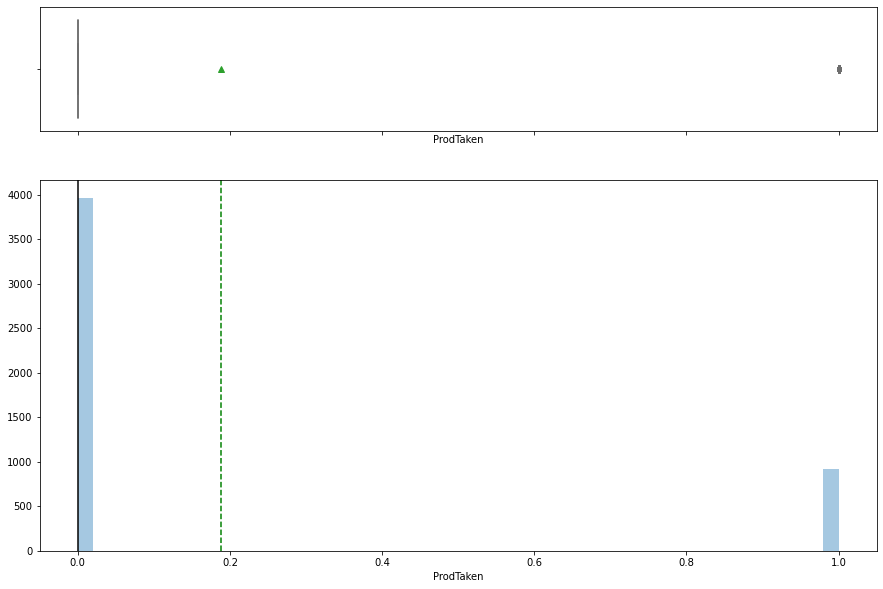

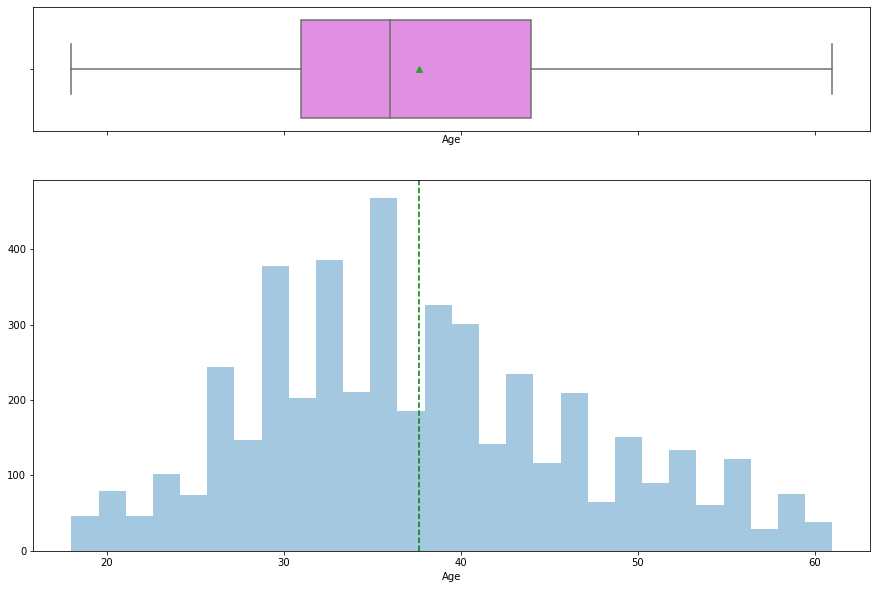

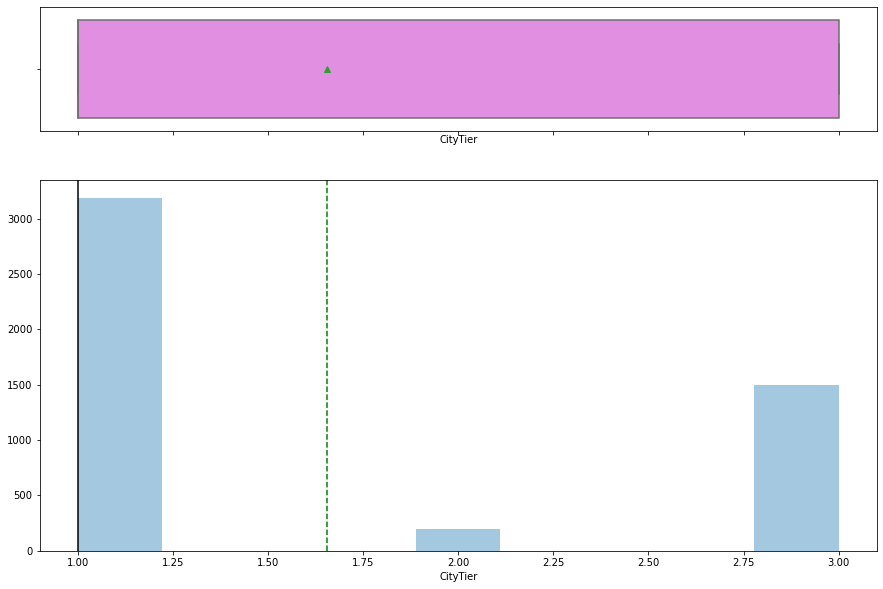

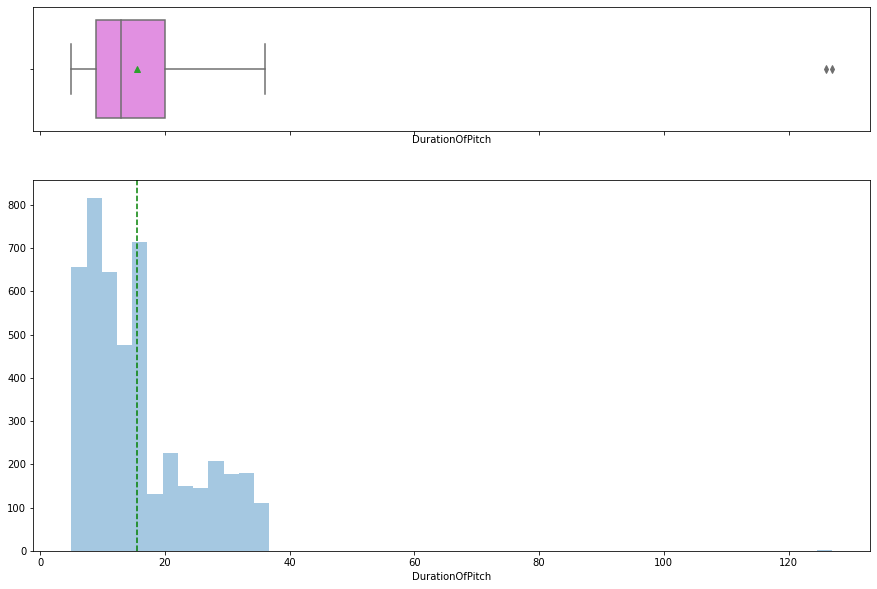

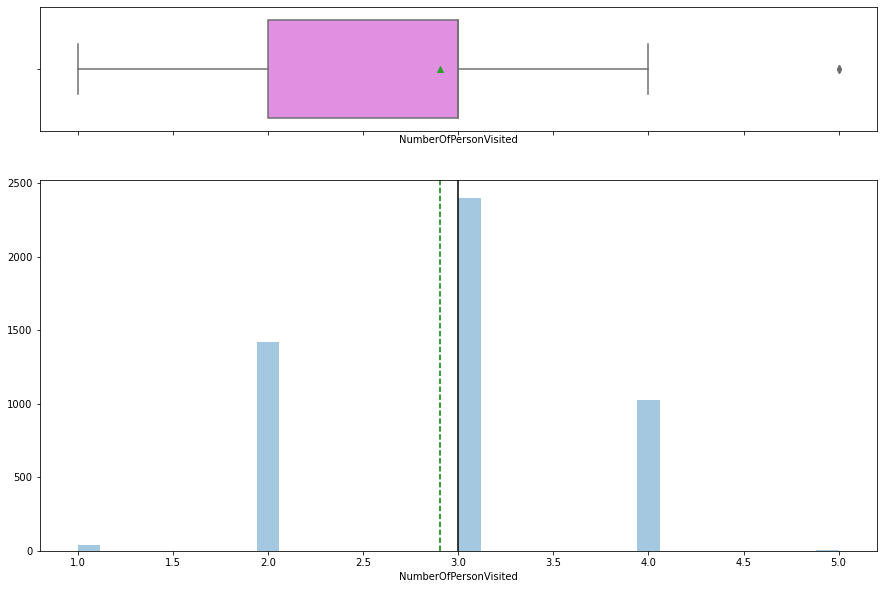

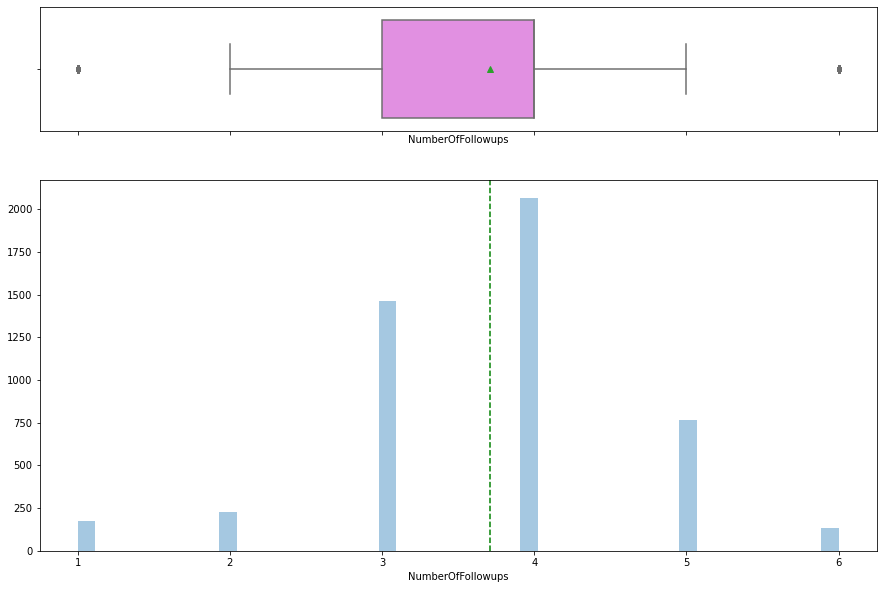

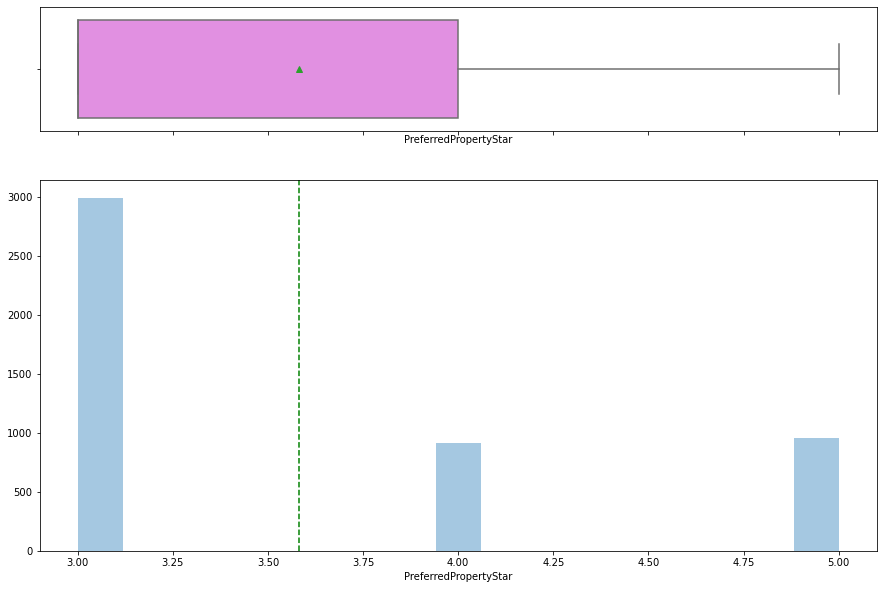

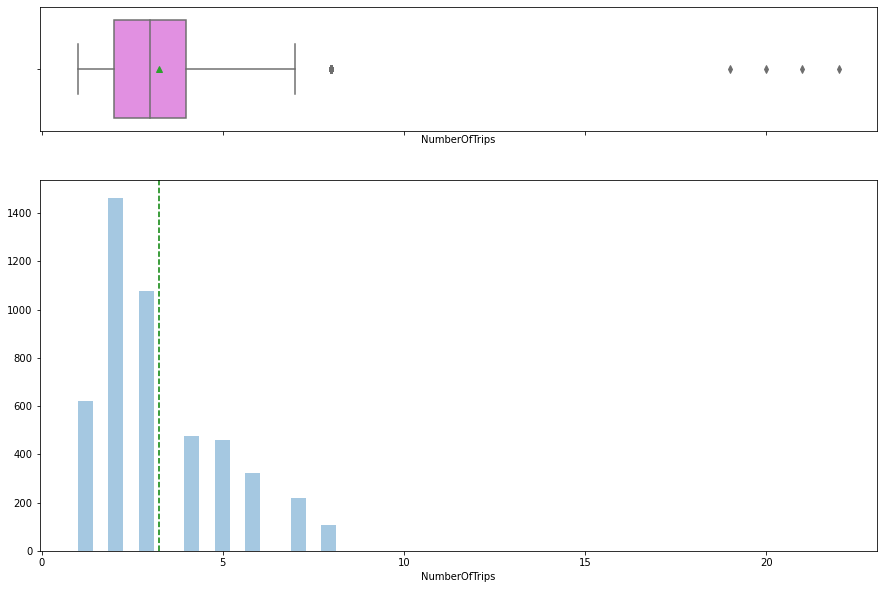

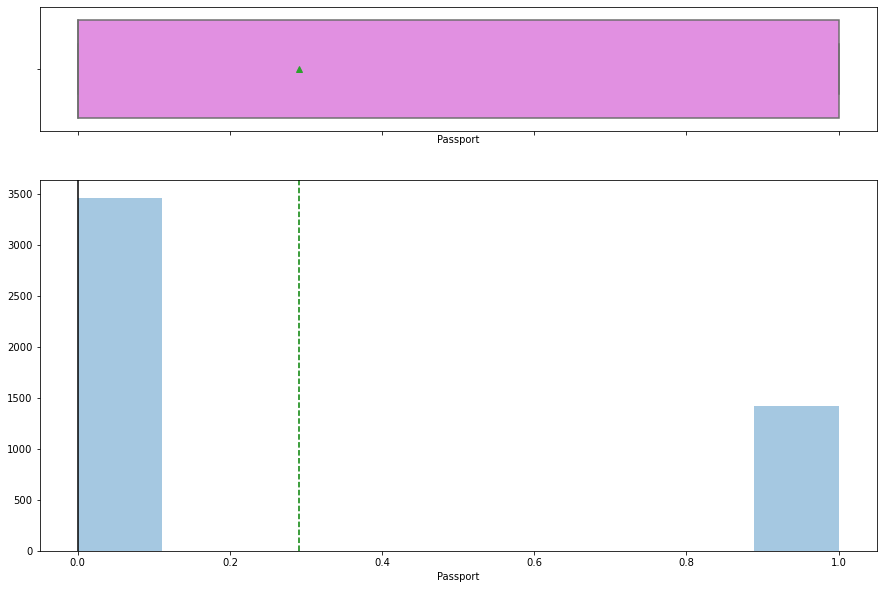

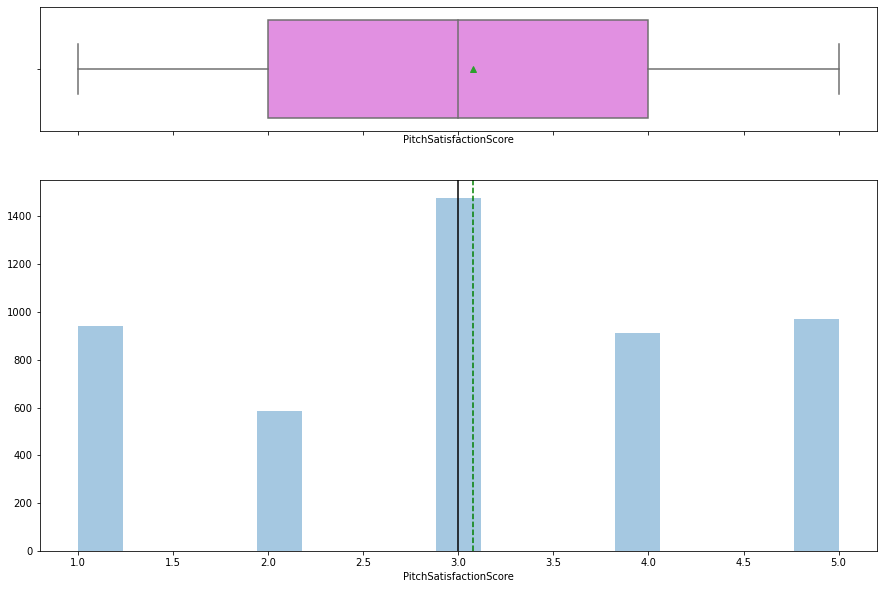

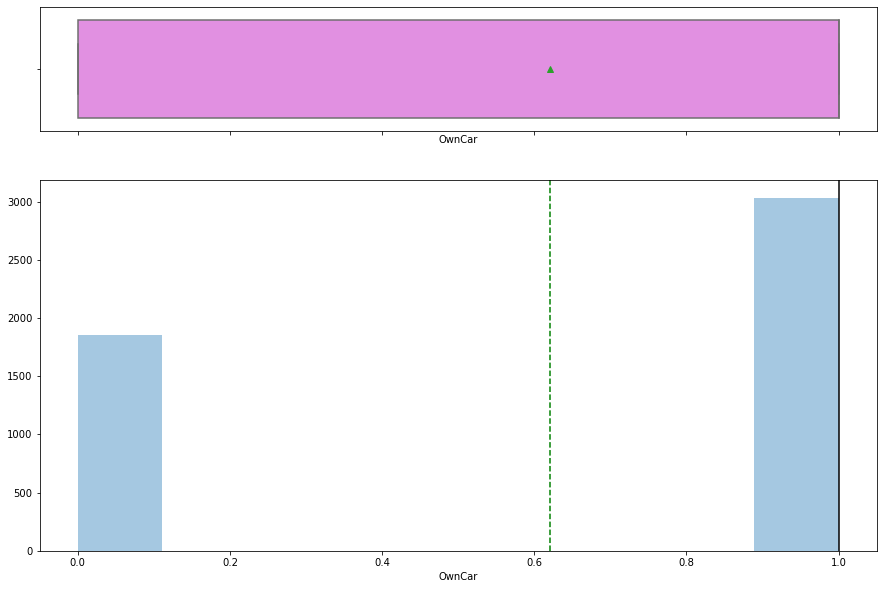

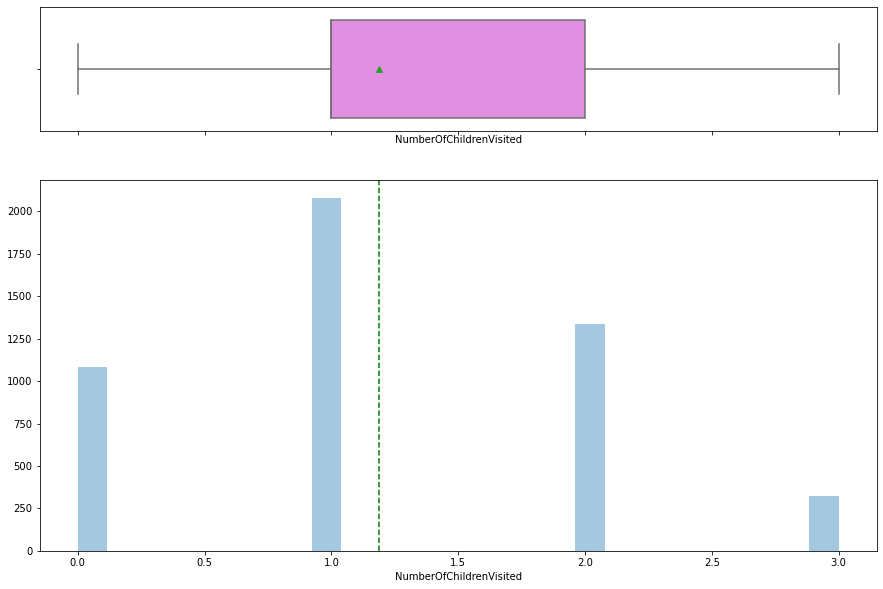

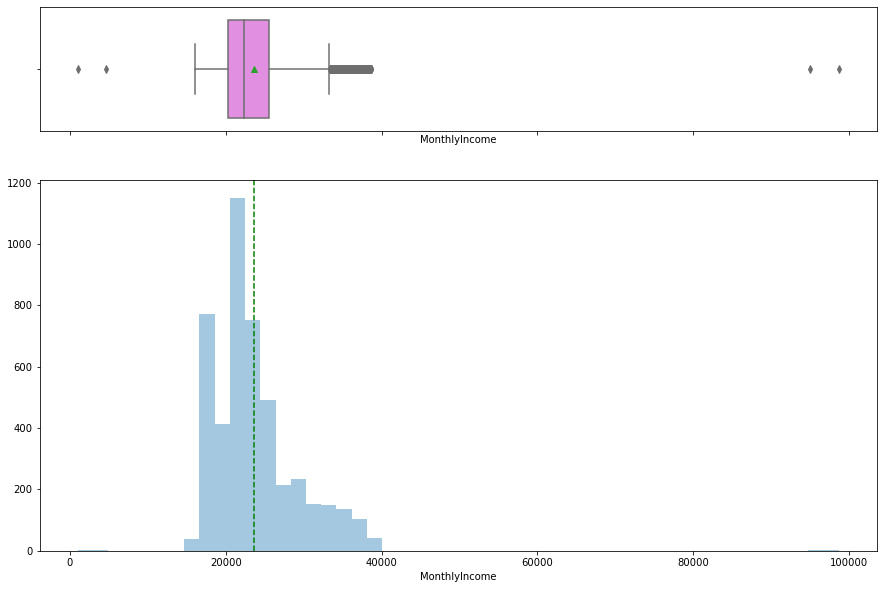

In [19]:
for feature in df.columns: # Loop through all columns in the dataframe
    if df[feature].dtype in ('int64','float64'): # Only apply for columns with categorical strings
        histogram_boxplot(df[feature])

### Insights
* Age seems to be have even distribution.
* There are more customers from Tier 1 and Tier 3 Cities

* There are a few outliers for Duration of Pitch, suggesting few customers were explained about different products for more time.
* Mostly number of persons visited were between 2 and 4 with very few having 5.
* Number of follow ups seems to have pretty even distribution, also suggesting that most customers need a few follow ups before they purchase a product.
* There are a few outliers for Number of Trips on the higher end. Suggesting that these might be returning/loyal customers.
* Quite a few people don't have passport. 
* Even distribution in terms of PitchSatisfactionScore.
* Most customers own a car.
* Most customers travel with children. There are very few customers who traveled without children as compared to those with.
* Monthly income shows some skewness. The data has few customers with low salaries and few with extremely high salaries as well. 


### Bivariate Analysis

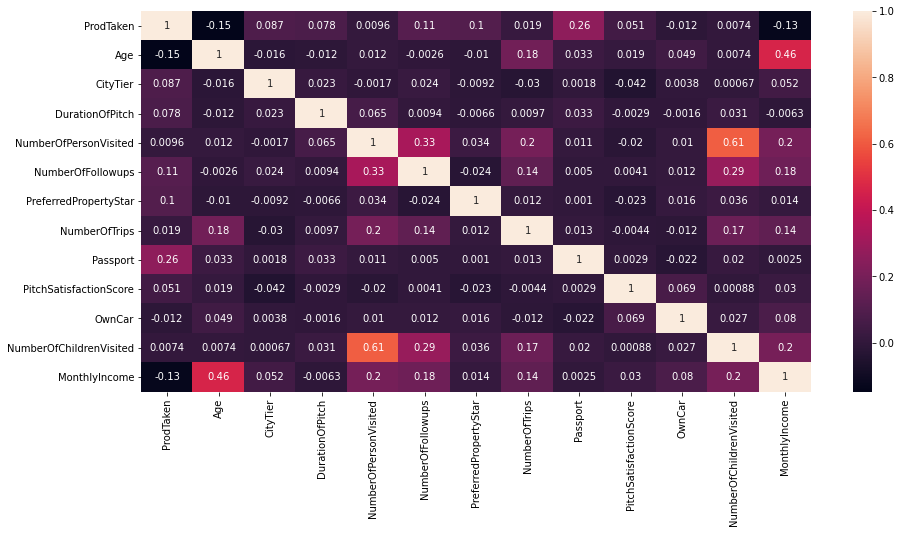

In [20]:
plt.figure(figsize=(15,7))
sns.heatmap(df.corr(),annot=True)
plt.show()

### Insights
* It seems Passport has good corelation with Prod Taken.
* Number of Person Visited and Number of Children visited have a corelation of 0.61. Which seem high.


In [21]:
df.head()

,ProdTaken,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfPersonVisited,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisited,Designation,MonthlyIncome
0,1,41.0,Self Enquiry,3,6.0,Salaried,Female,3,3.0,Deluxe,3.0,Single,1.0,1,2,1,0.0,Manager,20993.0
1,0,49.0,Company Invited,1,14.0,Salaried,Male,3,4.0,Deluxe,4.0,Divorced,2.0,0,3,1,2.0,Manager,20130.0
2,1,37.0,Self Enquiry,1,8.0,Free Lancer,Male,3,4.0,Basic,3.0,Single,7.0,1,3,0,0.0,Executive,17090.0
3,0,33.0,Company Invited,1,9.0,Salaried,Female,2,3.0,Basic,3.0,Divorced,2.0,1,5,1,1.0,Executive,17909.0
4,0,NaN,Self Enquiry,1,8.0,Small Business,Male,2,3.0,Basic,4.0,Divorced,1.0,0,5,1,0.0,Executive,18468.0


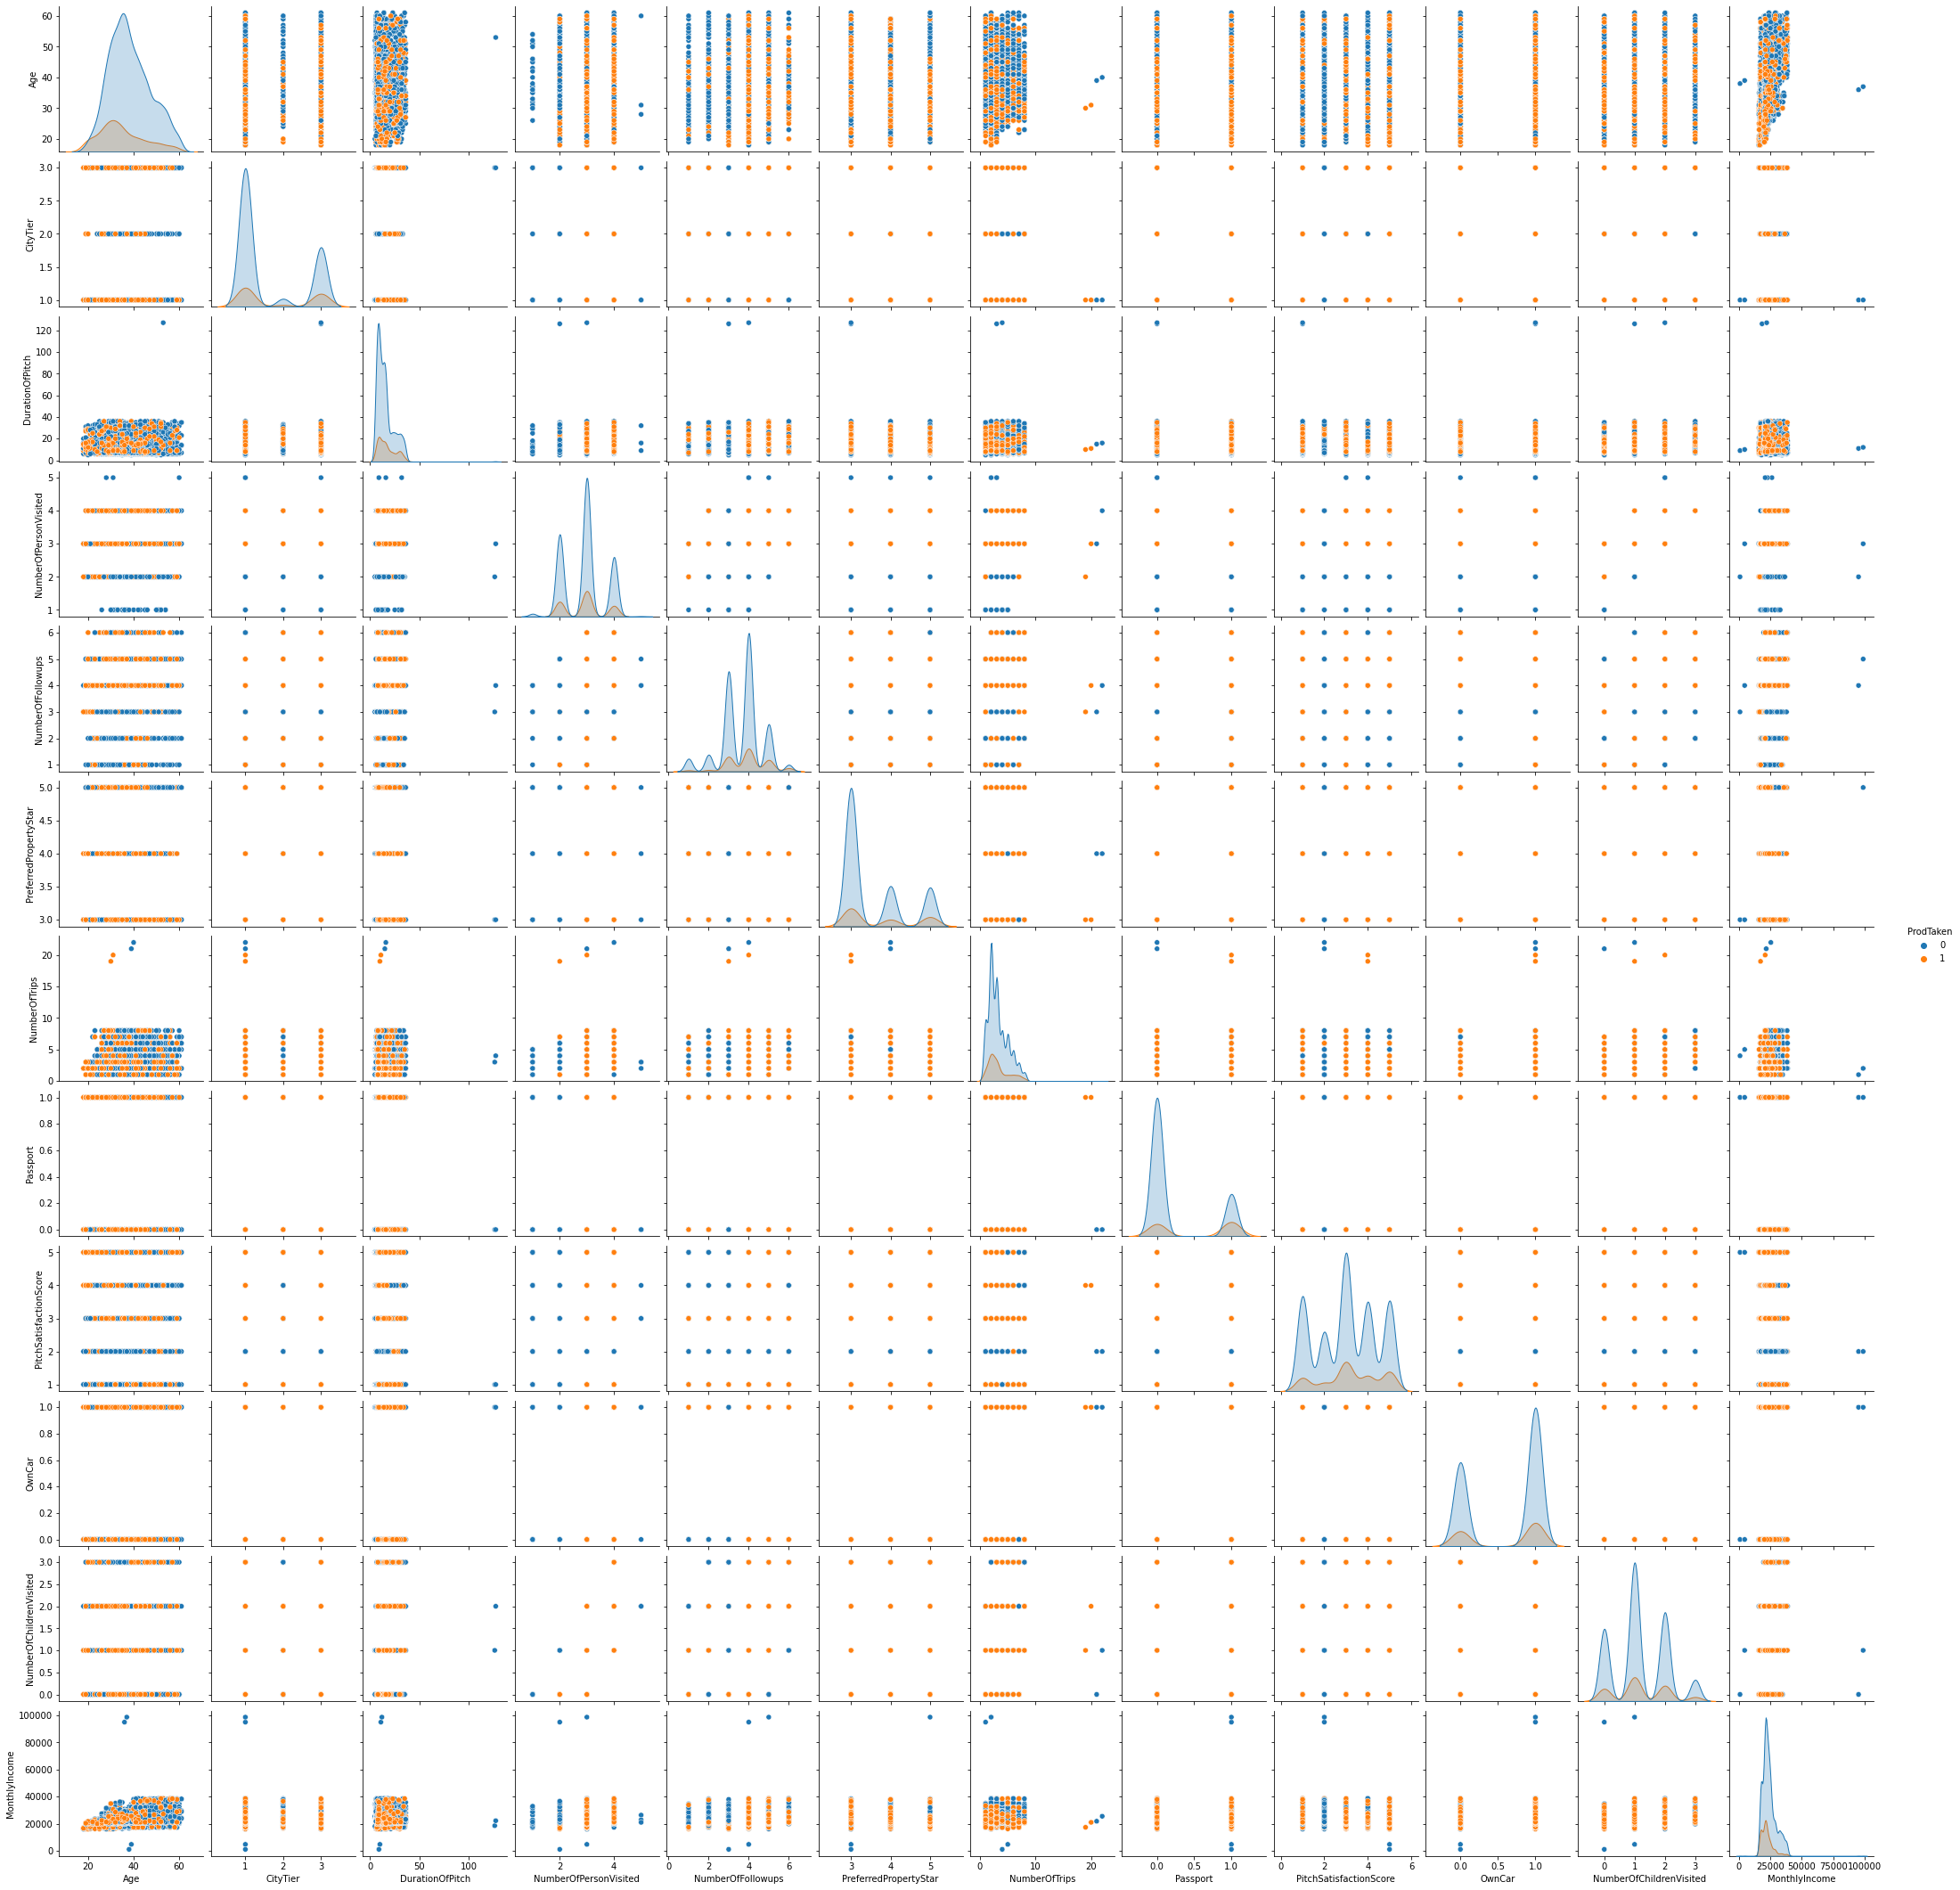

In [22]:
sns.pairplot(data=df,hue="ProdTaken",)
plt.show()

Various variables have different distribution, investigating further.

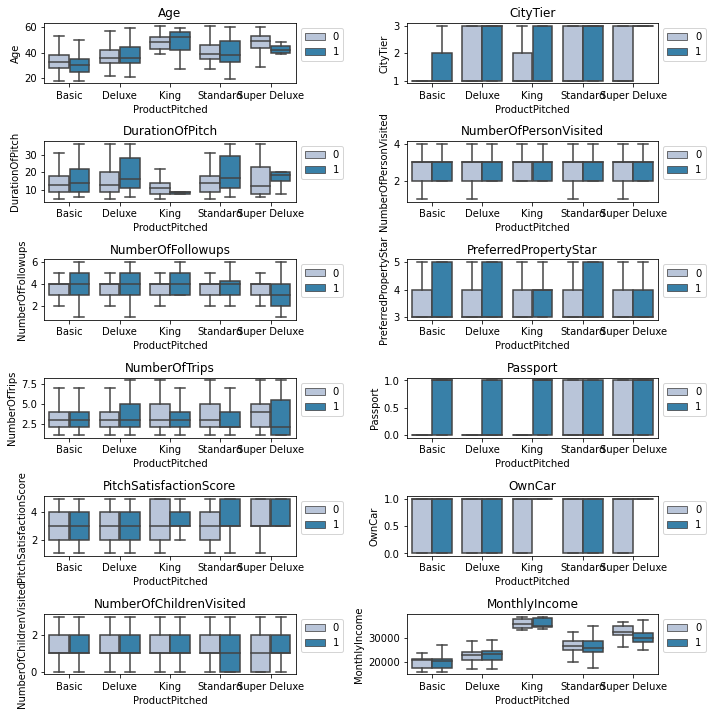

In [23]:
cols = list(df)
cols.remove('TypeofContact')
cols.remove('Occupation')
cols.remove('Gender')
cols.remove('MaritalStatus')
cols.remove('ProductPitched')
cols.remove('Designation')
cols.remove('ProdTaken')

plt.figure(figsize=(10,10))

for i, variable in enumerate(cols):
                     plt.subplot(6,2,i+1)
                     sns.boxplot(df["ProductPitched"],df[variable],hue=df['ProdTaken'],palette="PuBu", showfliers=False) #turning-off outliers
                     plt.tight_layout()
                     plt.legend(loc="upper left", bbox_to_anchor=(1,1))
                     plt.title(variable)
plt.show()

Age - The plot show as customers age increase they tend to buy Deluxe and above packages. Most customers buying Basic package are under the age of 40.

City Tier - The distribution of customers buying various packages from different city tiers is even. Except Basic package is purchased mostly by customers from Tier 1 and 2.

Duration of Pitch - It does look like duration of pitch might have some effect on the product purchased by customer.

Monthly Income - Does affect the type of package purchased by customer.

### Treating values

In [24]:
df.isnull().sum()

ProdTaken                    0
Age                        226
TypeofContact               25
CityTier                     0
DurationOfPitch            251
Occupation                   0
Gender                       0
NumberOfPersonVisited        0
NumberOfFollowups           45
ProductPitched               0
PreferredPropertyStar       26
MaritalStatus                0
NumberOfTrips              140
Passport                     0
PitchSatisfactionScore       0
OwnCar                       0
NumberOfChildrenVisited     66
Designation                  0
MonthlyIncome              233
dtype: int64

In [25]:

## checking for null values.

df.loc[df.isnull().any(axis=1)]


,ProdTaken,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfPersonVisited,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisited,Designation,MonthlyIncome
4,0,NaN,Self Enquiry,1,8.0,Small Business,Male,2,3.0,Basic,4.0,Divorced,1.0,0,5,1,0.0,Executive,18468.0
11,0,NaN,Self Enquiry,1,21.0,Salaried,Female,2,4.0,Deluxe,3.0,Single,1.0,1,3,0,0.0,Manager,NaN
19,0,NaN,Self Enquiry,1,8.0,Salaried,Male,2,3.0,Basic,3.0,Single,6.0,1,4,0,1.0,Executive,NaN
20,0,NaN,Company Invited,1,17.0,Salaried,Female,3,2.0,Deluxe,3.0,Married,1.0,0,3,1,2.0,Manager,NaN
21,1,NaN,Self Enquiry,3,15.0,Salaried,Male,2,4.0,Deluxe,5.0,Single,1.0,0,2,0,0.0,Manager,18407.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4850,1,46.0,Self Enquiry,3,8.0,Salaried,Male,4,5.0,Deluxe,5.0,Married,NaN,0,4,1,3.0,Manager,36739.0
4851,1,40.0,Self Enquiry,1,9.0,Salaried,Female,4,4.0,Basic,5.0,Married,NaN,1,1,1,1.0,Executive,35801.0
4868,1,43.0,Company Invited,2,15.0,Salaried,Female,4,5.0,Basic,3.0,Married,NaN,0,5,1,2.0,Executive,36539.0
4869,1,56.0,Self Enquiry,3,16.0,Small Business,Female,3,6.0,Basic,4.0,Single,NaN,0,1,1,2.0,Executive,37865.0


In [26]:
print(df['Age'].mode())
print(df['Age'].median())
print(df['Age'].mean())


0    35.0
dtype: float64
36.0
37.62226512226512


In [27]:
#replacing null values for Age with Median i.e 36.0

df['Age'].fillna(36.0, inplace=True)
df.head()

,ProdTaken,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfPersonVisited,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisited,Designation,MonthlyIncome
0,1,41.0,Self Enquiry,3,6.0,Salaried,Female,3,3.0,Deluxe,3.0,Single,1.0,1,2,1,0.0,Manager,20993.0
1,0,49.0,Company Invited,1,14.0,Salaried,Male,3,4.0,Deluxe,4.0,Divorced,2.0,0,3,1,2.0,Manager,20130.0
2,1,37.0,Self Enquiry,1,8.0,Free Lancer,Male,3,4.0,Basic,3.0,Single,7.0,1,3,0,0.0,Executive,17090.0
3,0,33.0,Company Invited,1,9.0,Salaried,Female,2,3.0,Basic,3.0,Divorced,2.0,1,5,1,1.0,Executive,17909.0
4,0,36.0,Self Enquiry,1,8.0,Small Business,Male,2,3.0,Basic,4.0,Divorced,1.0,0,5,1,0.0,Executive,18468.0


In [28]:
df[df['TypeofContact'].isna()]

,ProdTaken,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfPersonVisited,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisited,Designation,MonthlyIncome
224,0,31.0,NaN,1,NaN,Small Business,Male,2,5.0,Deluxe,3.0,Divorced,1.0,0,3,1,0.0,Manager,NaN
571,0,26.0,NaN,1,NaN,Salaried,Female,3,5.0,Basic,3.0,Married,4.0,0,4,1,2.0,Executive,NaN
572,0,29.0,NaN,1,NaN,Small Business,Female,3,3.0,Deluxe,3.0,Divorced,5.0,0,2,1,0.0,Manager,NaN
576,0,27.0,NaN,3,NaN,Small Business,Male,2,3.0,Deluxe,3.0,Divorced,1.0,0,3,0,1.0,Manager,NaN
579,0,34.0,NaN,1,NaN,Small Business,Female,2,4.0,Basic,5.0,Single,2.0,0,2,1,1.0,Executive,NaN
598,1,28.0,NaN,1,NaN,Small Business,Male,2,3.0,Basic,3.0,Single,7.0,0,3,0,0.0,Executive,NaN
622,0,32.0,NaN,3,NaN,Salaried,Male,3,3.0,Deluxe,3.0,Married,3.0,0,2,0,0.0,Manager,NaN
724,0,24.0,NaN,1,NaN,Small Business,Female,2,4.0,Deluxe,3.0,Married,2.0,0,3,1,1.0,Manager,NaN
843,0,26.0,NaN,1,NaN,Small Business,Male,2,1.0,Basic,3.0,Divorced,2.0,0,5,1,1.0,Executive,NaN
1021,1,25.0,NaN,3,NaN,Salaried,Male,3,4.0,Basic,5.0,Divorced,4.0,0,1,1,0.0,Executive,NaN


Checking to see if any relationship can be derived to better decide how to replace null values for Type of Contact

Doesn't show any obvious relationship that can be used.

In [29]:
df['TypeofContact'].mode()

0    Self Enquiry
Name: TypeofContact, dtype: category
Categories (2, object): ['Company Invited', 'Self Enquiry']

In [30]:
## using mode to replace null values for Type of Contact

df['TypeofContact'].fillna('Self Enquiry', inplace=True)
df.head()

,ProdTaken,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfPersonVisited,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisited,Designation,MonthlyIncome
0,1,41.0,Self Enquiry,3,6.0,Salaried,Female,3,3.0,Deluxe,3.0,Single,1.0,1,2,1,0.0,Manager,20993.0
1,0,49.0,Company Invited,1,14.0,Salaried,Male,3,4.0,Deluxe,4.0,Divorced,2.0,0,3,1,2.0,Manager,20130.0
2,1,37.0,Self Enquiry,1,8.0,Free Lancer,Male,3,4.0,Basic,3.0,Single,7.0,1,3,0,0.0,Executive,17090.0
3,0,33.0,Company Invited,1,9.0,Salaried,Female,2,3.0,Basic,3.0,Divorced,2.0,1,5,1,1.0,Executive,17909.0
4,0,36.0,Self Enquiry,1,8.0,Small Business,Male,2,3.0,Basic,4.0,Divorced,1.0,0,5,1,0.0,Executive,18468.0


In [31]:
df.loc[df['TypeofContact'] == 'Self Enquiry', "DurationOfPitch"].mode()

0    9.0
dtype: float64

In [32]:
df.loc[df['TypeofContact'] == 'Self Enquiry', "DurationOfPitch"].median()

13.0

In [33]:
df.loc[df['TypeofContact'] == 'Self Enquiry', "DurationOfPitch"].mean()

15.327883742052679

In [34]:
# finding central tendency of Company Invited customers.
print("Mode ",df.loc[df['TypeofContact'] == 'Company Invited', "DurationOfPitch"].mode())
print("Median ",df.loc[df['TypeofContact'] == 'Company Invited', "DurationOfPitch"].median())
print("Mean ",df.loc[df['TypeofContact'] == 'Company Invited', "DurationOfPitch"].mean())

Mode  0    9.0
dtype: float64
Median  14.0
Mean  15.894302848575713


In [35]:
# using the most common/mode value to replace nulls for DurationofPitch
df[df['DurationOfPitch'].isna()]


,ProdTaken,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfPersonVisited,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisited,Designation,MonthlyIncome
46,0,34.0,Company Invited,3,NaN,Small Business,Male,3,3.0,Deluxe,3.0,Single,1.0,0,5,1,1.0,Manager,19568.0
75,0,31.0,Self Enquiry,1,NaN,Salaried,Female,3,3.0,Deluxe,3.0,Single,2.0,0,5,0,1.0,Manager,NaN
76,0,35.0,Self Enquiry,3,NaN,Small Business,Male,2,4.0,Deluxe,5.0,Single,1.0,0,2,0,1.0,Manager,NaN
84,0,34.0,Self Enquiry,1,NaN,Small Business,Male,3,3.0,Deluxe,4.0,Divorced,2.0,0,5,0,0.0,Manager,NaN
103,0,34.0,Self Enquiry,1,NaN,Salaried,Female,2,3.0,Deluxe,3.0,Single,2.0,0,3,1,0.0,Manager,19809.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4215,0,19.0,Self Enquiry,3,NaN,Small Business,Female,4,5.0,Basic,3.0,Single,3.0,0,1,0,3.0,Executive,19878.0
4427,1,21.0,Self Enquiry,1,NaN,Small Business,Male,3,4.0,Basic,3.0,Single,3.0,1,5,1,2.0,Executive,19687.0
4641,0,19.0,Company Invited,1,NaN,Salaried,Male,4,4.0,Basic,3.0,Single,3.0,0,1,0,2.0,Executive,19729.0
4678,0,29.0,Self Enquiry,3,NaN,Small Business,Male,4,4.0,Basic,4.0,Married,3.0,0,5,0,3.0,Executive,19730.0


In [36]:
## needs to change, you have updated all the value to 9.

df['DurationOfPitch'].fillna(9.0, inplace=True)
df.head()

,ProdTaken,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfPersonVisited,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisited,Designation,MonthlyIncome
0,1,41.0,Self Enquiry,3,6.0,Salaried,Female,3,3.0,Deluxe,3.0,Single,1.0,1,2,1,0.0,Manager,20993.0
1,0,49.0,Company Invited,1,14.0,Salaried,Male,3,4.0,Deluxe,4.0,Divorced,2.0,0,3,1,2.0,Manager,20130.0
2,1,37.0,Self Enquiry,1,8.0,Free Lancer,Male,3,4.0,Basic,3.0,Single,7.0,1,3,0,0.0,Executive,17090.0
3,0,33.0,Company Invited,1,9.0,Salaried,Female,2,3.0,Basic,3.0,Divorced,2.0,1,5,1,1.0,Executive,17909.0
4,0,36.0,Self Enquiry,1,8.0,Small Business,Male,2,3.0,Basic,4.0,Divorced,1.0,0,5,1,0.0,Executive,18468.0


In [37]:
## checking values have been updated.
df.iloc[75]

ProdTaken                             0
Age                                  31
TypeofContact              Self Enquiry
CityTier                              1
DurationOfPitch                       9
Occupation                     Salaried
Gender                           Female
NumberOfPersonVisited                 3
NumberOfFollowups                     3
ProductPitched                   Deluxe
PreferredPropertyStar                 3
MaritalStatus                    Single
NumberOfTrips                         2
Passport                              0
PitchSatisfactionScore                5
OwnCar                                0
NumberOfChildrenVisited               1
Designation                     Manager
MonthlyIncome                       NaN
Name: 75, dtype: object

In [38]:
# ensuring value for Company Invited is updated.
df.iloc[46]

ProdTaken                                0
Age                                     34
TypeofContact              Company Invited
CityTier                                 3
DurationOfPitch                          9
Occupation                  Small Business
Gender                                Male
NumberOfPersonVisited                    3
NumberOfFollowups                        3
ProductPitched                      Deluxe
PreferredPropertyStar                    3
MaritalStatus                       Single
NumberOfTrips                            1
Passport                                 0
PitchSatisfactionScore                   5
OwnCar                                   1
NumberOfChildrenVisited                  1
Designation                        Manager
MonthlyIncome                        19568
Name: 46, dtype: object

In [39]:
# finding central tendency of Company Invited customers.
print("Mode ",df.loc[df['TypeofContact'] == 'Company Invited', "DurationOfPitch"].mode())
print("Median ",df.loc[df['TypeofContact'] == 'Company Invited', "DurationOfPitch"].median())
print("Mean ",df.loc[df['TypeofContact'] == 'Company Invited', "DurationOfPitch"].mean())

Mode  0    9.0
dtype: float64
Median  13.0
Mean  15.481324876673714


In [40]:
df.isnull().sum()

ProdTaken                    0
Age                          0
TypeofContact                0
CityTier                     0
DurationOfPitch              0
Occupation                   0
Gender                       0
NumberOfPersonVisited        0
NumberOfFollowups           45
ProductPitched               0
PreferredPropertyStar       26
MaritalStatus                0
NumberOfTrips              140
Passport                     0
PitchSatisfactionScore       0
OwnCar                       0
NumberOfChildrenVisited     66
Designation                  0
MonthlyIncome              233
dtype: int64

In [41]:
## working on Number of Follow Ups.

df[df['NumberOfFollowups'].isna()]

,ProdTaken,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfPersonVisited,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisited,Designation,MonthlyIncome
79,0,46.0,Self Enquiry,2,11.0,Small Business,Male,3,NaN,Deluxe,4.0,Married,1.0,1,5,0,1.0,Manager,20021.0
94,0,32.0,Self Enquiry,3,12.0,Small Business,Male,2,NaN,Deluxe,3.0,Single,2.0,0,5,1,0.0,Manager,20010.0
96,0,24.0,Self Enquiry,3,9.0,Salaried,Female,2,NaN,Deluxe,3.0,Divorced,1.0,0,4,1,0.0,Manager,19999.0
122,1,56.0,Self Enquiry,1,20.0,Salaried,Female,3,NaN,Basic,4.0,Divorced,1.0,1,5,1,1.0,Executive,19963.0
135,0,36.0,Self Enquiry,1,12.0,Small Business,Male,2,NaN,Deluxe,4.0,Married,7.0,0,4,1,1.0,Manager,19941.0
174,0,45.0,Self Enquiry,3,10.0,Salaried,Female,1,NaN,Deluxe,5.0,Married,5.0,1,4,0,0.0,Manager,20006.0
317,1,52.0,Self Enquiry,1,14.0,Small Business,Male,2,NaN,Deluxe,4.0,Divorced,3.0,0,2,1,1.0,Manager,19941.0
322,0,32.0,Self Enquiry,1,8.0,Small Business,Female,3,NaN,Deluxe,3.0,Single,1.0,0,3,1,2.0,Manager,20055.0
376,0,51.0,Self Enquiry,3,20.0,Salaried,Female,2,NaN,Deluxe,3.0,Divorced,5.0,0,3,0,1.0,Manager,19936.0
532,0,47.0,Self Enquiry,3,20.0,Small Business,Male,2,NaN,Deluxe,5.0,Single,3.0,0,2,0,1.0,Manager,19960.0


Looking at the above data, it seems most of the missing values are for Occupation Small Business. 

In [42]:
# finding central tendency of Small Business  customers.
print("Mode ",df.loc[df['Occupation'] == 'Small Business', "NumberOfFollowups"].mode())
print("Median ",df.loc[df['Occupation'] == 'Small Business', "NumberOfFollowups"].median())
print("Mean ",df.loc[df['Occupation'] == 'Small Business', "NumberOfFollowups"].mean())

Mode  0    4.0
dtype: float64
Median  4.0
Mean  3.695778748180495


In [43]:
#replacing null values for Number of Follow ups with Mode i.e 4.0

df['NumberOfFollowups'].fillna(4.0, inplace=True)
df.head()

,ProdTaken,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfPersonVisited,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisited,Designation,MonthlyIncome
0,1,41.0,Self Enquiry,3,6.0,Salaried,Female,3,3.0,Deluxe,3.0,Single,1.0,1,2,1,0.0,Manager,20993.0
1,0,49.0,Company Invited,1,14.0,Salaried,Male,3,4.0,Deluxe,4.0,Divorced,2.0,0,3,1,2.0,Manager,20130.0
2,1,37.0,Self Enquiry,1,8.0,Free Lancer,Male,3,4.0,Basic,3.0,Single,7.0,1,3,0,0.0,Executive,17090.0
3,0,33.0,Company Invited,1,9.0,Salaried,Female,2,3.0,Basic,3.0,Divorced,2.0,1,5,1,1.0,Executive,17909.0
4,0,36.0,Self Enquiry,1,8.0,Small Business,Male,2,3.0,Basic,4.0,Divorced,1.0,0,5,1,0.0,Executive,18468.0


In [44]:
# working on preferred property star.

df[df['PreferredPropertyStar'].isna()]

,ProdTaken,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfPersonVisited,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisited,Designation,MonthlyIncome
38,0,36.0,Self Enquiry,1,11.0,Salaried,Female,2,4.0,Basic,NaN,Divorced,1.0,1,2,1,0.0,Executive,95000.0
2609,0,51.0,Self Enquiry,1,18.0,Salaried,Female,3,4.0,King,NaN,Single,5.0,0,5,1,1.0,VP,38604.0
2634,0,53.0,Self Enquiry,1,7.0,Salaried,Male,4,5.0,King,NaN,Divorced,2.0,0,2,1,2.0,VP,38677.0
3012,1,56.0,Self Enquiry,1,9.0,Small Business,Male,4,4.0,King,NaN,Divorced,7.0,1,2,1,3.0,VP,38537.0
3190,0,42.0,Company Invited,1,14.0,Salaried,Female,3,6.0,King,NaN,Married,3.0,0,4,1,1.0,VP,38651.0
3193,1,53.0,Self Enquiry,3,9.0,Small Business,Female,3,6.0,King,NaN,Divorced,3.0,0,3,1,1.0,VP,38523.0
3214,0,47.0,Self Enquiry,1,7.0,Small Business,Male,3,4.0,King,NaN,Married,2.0,0,5,1,2.0,VP,38305.0
3295,0,57.0,Self Enquiry,1,11.0,Large Business,Female,4,4.0,King,NaN,Married,6.0,0,4,0,3.0,VP,38621.0
3342,0,44.0,Self Enquiry,1,10.0,Salaried,Male,4,6.0,King,NaN,Divorced,5.0,0,5,1,3.0,VP,38418.0
3362,0,52.0,Company Invited,3,16.0,Salaried,Male,3,4.0,King,NaN,Married,6.0,1,4,1,2.0,VP,38525.0


In [45]:
# assuming that the property star would be linked to the type of product

# finding central tendency of Small Business  customers.
print("Mode ",df.loc[df['ProductPitched'] == 'King', "PreferredPropertyStar"].mode())
print("Median ",df.loc[df['ProductPitched'] == 'King', "PreferredPropertyStar"].median())
print("Mean ",df.loc[df['ProductPitched'] == 'King', "PreferredPropertyStar"].mean())

Mode  0    3.0
dtype: float64
Median  3.0
Mean  3.4782608695652173


In [46]:
print("Mode ",df.loc[df['ProductPitched'] == 'Deluxe', "PreferredPropertyStar"].mode())
print("Median ",df.loc[df['ProductPitched'] == 'Deluxe', "PreferredPropertyStar"].median())
print("Mean ",df.loc[df['ProductPitched'] == 'Deluxe', "PreferredPropertyStar"].mean())

Mode  0    3.0
dtype: float64
Median  3.0
Mean  3.560369728480647


In [47]:
print("Mode ",df.loc[df['ProductPitched'] == 'Standard', "PreferredPropertyStar"].mode())
print("Median ",df.loc[df['ProductPitched'] == 'Standard', "PreferredPropertyStar"].median())
print("Mean ",df.loc[df['ProductPitched'] == 'Standard', "PreferredPropertyStar"].mean())

Mode  0    3.0
dtype: float64
Median  3.0
Mean  3.6477732793522266


In [48]:
print("Mode ",df.loc[df['ProductPitched'] == 'Basic', "PreferredPropertyStar"].mode())
print("Median ",df.loc[df['ProductPitched'] == 'Basic', "PreferredPropertyStar"].median())
print("Mean ",df.loc[df['ProductPitched'] == 'Basic', "PreferredPropertyStar"].mean())

Mode  0    3.0
dtype: float64
Median  3.0
Mean  3.585551330798479


Since, all different products have the same property star mode value, using mode to replace nulls.

In [49]:
df['PreferredPropertyStar'].fillna(3.0, inplace=True)
df.head()

,ProdTaken,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfPersonVisited,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisited,Designation,MonthlyIncome
0,1,41.0,Self Enquiry,3,6.0,Salaried,Female,3,3.0,Deluxe,3.0,Single,1.0,1,2,1,0.0,Manager,20993.0
1,0,49.0,Company Invited,1,14.0,Salaried,Male,3,4.0,Deluxe,4.0,Divorced,2.0,0,3,1,2.0,Manager,20130.0
2,1,37.0,Self Enquiry,1,8.0,Free Lancer,Male,3,4.0,Basic,3.0,Single,7.0,1,3,0,0.0,Executive,17090.0
3,0,33.0,Company Invited,1,9.0,Salaried,Female,2,3.0,Basic,3.0,Divorced,2.0,1,5,1,1.0,Executive,17909.0
4,0,36.0,Self Enquiry,1,8.0,Small Business,Male,2,3.0,Basic,4.0,Divorced,1.0,0,5,1,0.0,Executive,18468.0


In [50]:
## working on NumberOfTrips.

df[df['NumberOfTrips'].isna()]

,ProdTaken,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfPersonVisited,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisited,Designation,MonthlyIncome
2469,0,54.0,Self Enquiry,1,12.0,Salaried,Female,3,4.0,King,3.0,Married,NaN,0,5,0,2.0,VP,37772.0
2473,0,47.0,Self Enquiry,3,9.0,Small Business,Female,3,4.0,King,5.0,Single,NaN,0,2,0,2.0,VP,37625.0
2506,0,51.0,Self Enquiry,1,14.0,Small Business,Female,3,5.0,King,3.0,Married,NaN,1,4,1,2.0,VP,37418.0
2549,0,60.0,Company Invited,2,9.0,Salaried,Female,3,5.0,King,3.0,Divorced,NaN,0,2,1,2.0,VP,37522.0
2550,0,51.0,Company Invited,1,7.0,Salaried,Female,4,4.0,King,4.0,Divorced,NaN,1,2,0,3.0,VP,36850.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4836,1,45.0,Self Enquiry,3,16.0,Salaried,Male,4,5.0,Basic,5.0,Married,NaN,0,1,1,3.0,Executive,37868.0
4850,1,46.0,Self Enquiry,3,8.0,Salaried,Male,4,5.0,Deluxe,5.0,Married,NaN,0,4,1,3.0,Manager,36739.0
4851,1,40.0,Self Enquiry,1,9.0,Salaried,Female,4,4.0,Basic,5.0,Married,NaN,1,1,1,1.0,Executive,35801.0
4868,1,43.0,Company Invited,2,15.0,Salaried,Female,4,5.0,Basic,3.0,Married,NaN,0,5,1,2.0,Executive,36539.0


In [51]:
# checking if not having passport means there were no trips made?
df[df['Passport']==0]

,ProdTaken,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfPersonVisited,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisited,Designation,MonthlyIncome
1,0,49.0,Company Invited,1,14.0,Salaried,Male,3,4.0,Deluxe,4.0,Divorced,2.0,0,3,1,2.0,Manager,20130.0
4,0,36.0,Self Enquiry,1,8.0,Small Business,Male,2,3.0,Basic,4.0,Divorced,1.0,0,5,1,0.0,Executive,18468.0
5,0,32.0,Company Invited,1,8.0,Salaried,Male,3,3.0,Basic,3.0,Single,1.0,0,5,1,1.0,Executive,18068.0
7,0,30.0,Self Enquiry,1,30.0,Salaried,Male,3,3.0,Basic,3.0,Married,2.0,0,2,0,1.0,Executive,17693.0
8,0,38.0,Company Invited,1,29.0,Salaried,Male,2,4.0,Standard,3.0,Unmarried,1.0,0,3,0,0.0,Senior Manager,24526.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4878,1,35.0,Self Enquiry,1,17.0,Small Business,Male,3,4.0,Deluxe,5.0,Unmarried,3.0,0,4,0,1.0,Manager,24803.0
4880,1,59.0,Self Enquiry,1,28.0,Small Business,Female,4,4.0,Deluxe,4.0,Married,6.0,0,3,1,2.0,Manager,28686.0
4881,1,41.0,Self Enquiry,2,25.0,Salaried,Male,3,2.0,Basic,5.0,Married,2.0,0,1,1,2.0,Executive,21065.0
4885,1,52.0,Self Enquiry,3,17.0,Salaried,Female,4,4.0,Standard,4.0,Married,7.0,0,1,1,3.0,Senior Manager,31820.0


Data shows people with no passport did make trips and buy product.

In [52]:
print("Mode ",df['NumberOfTrips'].mode())
print("Median ",df['NumberOfTrips'].mode())
print("Mean ",df['NumberOfTrips'].mode())

Mode  0    2.0
dtype: float64
Median  0    2.0
dtype: float64
Mean  0    2.0
dtype: float64


As mode, mean and median are all the same, using 2.0 to replace null values seem like the best option. Not investigating further, we will assign value 2.0 to replace the nulls.

In [53]:
df['NumberOfTrips'].fillna(2.0, inplace=True)
df.head()

,ProdTaken,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfPersonVisited,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisited,Designation,MonthlyIncome
0,1,41.0,Self Enquiry,3,6.0,Salaried,Female,3,3.0,Deluxe,3.0,Single,1.0,1,2,1,0.0,Manager,20993.0
1,0,49.0,Company Invited,1,14.0,Salaried,Male,3,4.0,Deluxe,4.0,Divorced,2.0,0,3,1,2.0,Manager,20130.0
2,1,37.0,Self Enquiry,1,8.0,Free Lancer,Male,3,4.0,Basic,3.0,Single,7.0,1,3,0,0.0,Executive,17090.0
3,0,33.0,Company Invited,1,9.0,Salaried,Female,2,3.0,Basic,3.0,Divorced,2.0,1,5,1,1.0,Executive,17909.0
4,0,36.0,Self Enquiry,1,8.0,Small Business,Male,2,3.0,Basic,4.0,Divorced,1.0,0,5,1,0.0,Executive,18468.0


In [54]:
## working on NumberOfTrips.

df[df['NumberOfChildrenVisited'].isna()]

,ProdTaken,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfPersonVisited,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisited,Designation,MonthlyIncome
165,0,50.0,Self Enquiry,1,17.0,Salaried,Female,2,3.0,King,4.0,Single,4.0,0,5,1,NaN,VP,34926.0
190,0,52.0,Self Enquiry,1,6.0,Salaried,Male,3,4.0,King,3.0,Divorced,1.0,0,2,1,NaN,VP,34999.0
568,1,55.0,Self Enquiry,1,8.0,Small Business,Male,3,3.0,King,5.0,Divorced,6.0,1,2,1,NaN,VP,34859.0
746,0,41.0,Company Invited,1,13.0,Salaried,Female,2,5.0,King,3.0,Married,2.0,0,4,1,NaN,VP,34973.0
749,1,52.0,Self Enquiry,3,8.0,Small Business,Female,2,5.0,King,3.0,Divorced,2.0,0,3,1,NaN,VP,34845.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4475,0,53.0,Self Enquiry,3,10.0,Small Business,Male,3,5.0,Super Deluxe,5.0,Married,3.0,0,5,1,NaN,AVP,35534.0
4506,0,48.0,Self Enquiry,1,9.0,Salaried,Female,3,4.0,Super Deluxe,3.0,Married,3.0,1,4,1,NaN,AVP,35430.0
4530,0,52.0,Self Enquiry,3,33.0,Small Business,Female,4,4.0,Super Deluxe,3.0,Married,4.0,0,3,1,NaN,AVP,34985.0
4688,0,56.0,Company Invited,1,9.0,Small Business,Male,3,5.0,Super Deluxe,5.0,Single,2.0,0,3,1,NaN,AVP,35434.0


Looking at the heat map, we can see there is high co-relation between number of person visited and the number of children. This is most likely because more number of person likely mean children traveled together. Hence, dropping Number of Children from the dataframe.

In [55]:
df.drop('NumberOfChildrenVisited', axis=1, inplace = True)

Since, Age and Monthly Income also have a co-relation, dropping monthly income to see how the model performs. If the model performance is not up to the mark we may evaluate training with Income.

In [56]:
df.drop('MonthlyIncome', axis=1, inplace = True)

### Split the dataset

In [57]:
# Separating features and the target column
X = df.drop('ProdTaken', axis=1)
y = df['ProdTaken']

In [58]:
from sklearn.tree import DecisionTreeClassifier
,RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier, StackingClassifier
from xgboost import XGBClassifier
from sklearn import metrics
from sklearn.model_selection import GridSearchCV, train_test_split

In [59]:
## get dummies/one hot encode

X = pd.get_dummies(X, drop_first=True)
X.head()

,Age,CityTier,DurationOfPitch,NumberOfPersonVisited,NumberOfFollowups,PreferredPropertyStar,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,...,ProductPitched_King,ProductPitched_Standard,ProductPitched_Super Deluxe,MaritalStatus_Married,MaritalStatus_Single,MaritalStatus_Unmarried,Designation_Executive,Designation_Manager,Designation_Senior Manager,Designation_VP
0,41.0,3,6.0,3,3.0,3.0,1.0,1,2,1,...,0,0,0,0,1,0,0,1,0,0
1,49.0,1,14.0,3,4.0,4.0,2.0,0,3,1,...,0,0,0,0,0,0,0,1,0,0
2,37.0,1,8.0,3,4.0,3.0,7.0,1,3,0,...,0,0,0,0,1,0,1,0,0,0
3,33.0,1,9.0,2,3.0,3.0,2.0,1,5,1,...,0,0,0,0,0,0,1,0,0,0
4,36.0,1,8.0,2,3.0,4.0,1.0,0,5,1,...,0,0,0,0,0,0,1,0,0,0


In [60]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=1, shuffle=True)

In [61]:
X_train.shape, X_test.shape

((3421, 27), (1467, 27))

We have 3,421 observations in train set and 1,467 observations in test set.

In [62]:
#checking distribution of split and comparing with original data set
print("Original True Values    : {0} ({1:0.2f}%)".format(len(df.loc[df['ProdTaken'] == 1]), (len(df.loc[df['ProdTaken'] == 1])/len(df.index)) * 100))
print("Original False Values   : {0} ({1:0.2f}%)".format(len(df.loc[df['ProdTaken'] == 0]), (len(df.loc[df['ProdTaken'] == 0])/len(df.index)) * 100))
print("")
print("Training True Values    : {0} ({1:0.2f}%)".format(len(y_train[y_train[:] == 1]), (len(y_train[y_train[:] == 1])/len(y_train)) * 100))
print("Training False Values   : {0} ({1:0.2f}%)".format(len(y_train[y_train[:] == 0]), (len(y_train[y_train[:] == 0])/len(y_train)) * 100))
print("")
print("Test True Values        : {0} ({1:0.2f}%)".format(len(y_test[y_test[:] == 1]), (len(y_test[y_test[:] == 1])/len(y_test)) * 100))
print("Test False Values       : {0} ({1:0.2f}%)".format(len(y_test[y_test[:] == 0]), (len(y_test[y_test[:] == 0])/len(y_test)) * 100))
print("")

Original True Values    : 920 (18.82%)
Original False Values   : 3968 (81.18%)

Training True Values    : 624 (18.24%)
Training False Values   : 2797 (81.76%)

Test True Values        : 296 (20.18%)
Test False Values       : 1171 (79.82%)



The test and train data set maintain the distribution of true and false values.

### building Decision Tree Classifier
Since the distribution of target variable is skewed, we will use Class weight to assing a value of 20% to Class 0 and 80% to class 1

### Metric of Choice for Model Performance

Based on the problem description above, the business wants to reduce marketing costs and at the same time wants to increase the number of customers who will buy the product. 
So we will use PRECISION as our measure of success. Using precision will ensure that are fewer False Positive and hence, more energy and money will be spent on customers who are most likely to buy the product.

On the flip side, one could argue that Recall should be a measure of success here, as low recall means there will be some customers who would likely buy a product that will get missed. Ability to have a dialog with the business team can help make a better decision on the right metric to use. 

However, since the problem statement mentions marketing costs are to be reduced we will concentrate of optimizing PRECISION.

In [63]:
dt = DecisionTreeClassifier(criterion='gini',class_weight = {0:.20,1:.80},random_state=1)

In [64]:
dt.fit(X_train, y_train)

DecisionTreeClassifier(class_weight={0: 0.2, 1: 0.8}, random_state=1)

In [65]:
## creating function for confusion matrix
def make_confusion_matrix(model,y_actual,labels=[1, 0]):
    '''
    model : classifier to predict values of X
    y_actual : ground truth  
    
    '''
    y_predict = model.predict(X_test)
    cm=metrics.confusion_matrix( y_actual, y_predict, labels=[0, 1])
    df_cm = pd.DataFrame(cm, index = [i for i in ["Actual - No","Actual - Yes"]],
                  columns = [i for i in ['Predicted - No','Predicted - Yes']])
    group_counts = ["{0:0.0f}".format(value) for value in
                cm.flatten()]
    group_percentages = ["{0:.2%}".format(value) for value in
                         cm.flatten()/np.sum(cm)]
    labels = [f"{v1}\n{v2}" for v1, v2 in
              zip(group_counts,group_percentages)]
    labels = np.asarray(labels).reshape(2,2)
    plt.figure(figsize = (10,7))
    sns.heatmap(df_cm, annot=labels,fmt='')
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [66]:
##  Function to calculate different metric scores of the model - Accuracy, Recall and Precision
def get_metrics_score(model,flag=True):
    '''
    model : classifier to predict values of X

    '''
    # defining an empty list to store train and test results
    score_list=[] 
    
    #Predicting on train and tests
    pred_train = model.predict(X_train)
    pred_test = model.predict(X_test)
    
    #Accuracy of the model
    train_acc = model.score(X_train,y_train)
    test_acc = model.score(X_test,y_test)
    
    #Recall of the model
    train_recall = metrics.recall_score(y_train,pred_train)
    test_recall = metrics.recall_score(y_test,pred_test)
    
    #Precision of the model
    train_precision = metrics.precision_score(y_train,pred_train)
    test_precision = metrics.precision_score(y_test,pred_test)
    
    #F1 of the model
    train_f1 = metrics.f1_score(y_train,pred_train)
    test_f1 = metrics.f1_score(y_test,pred_test)
    
    score_list.extend((train_acc,test_acc,train_recall,test_recall,train_precision,test_precision,train_f1,test_f1))
        
    # If the flag is set to True then only the following print statements will be dispayed. The default value is set to True.
    if flag == True: 
        print("Accuracy on training set : ",model.score(X_train,y_train))
        print("Accuracy on test set : ",model.score(X_test,y_test))
        print("Recall on training set : ",metrics.recall_score(y_train,pred_train))
        print("Recall on test set : ",metrics.recall_score(y_test,pred_test))
        print("Precision on training set : ",metrics.precision_score(y_train,pred_train))
        print("Precision on test set : ",metrics.precision_score(y_test,pred_test))
        print("F1 Score on training set : ",metrics.f1_score(y_train,pred_train))
        print("F1 Score on test set : ",metrics.f1_score(y_test,pred_test))

    
    return score_list # returning the list with train and test scores

Accuracy on training set :  1.0
Accuracy on test set :  0.9059304703476483
Recall on training set :  1.0
Recall on test set :  0.7466216216216216
Precision on training set :  1.0
Precision on test set :  0.778169014084507
F1 Score on training set :  1.0
F1 Score on test set :  0.7620689655172413


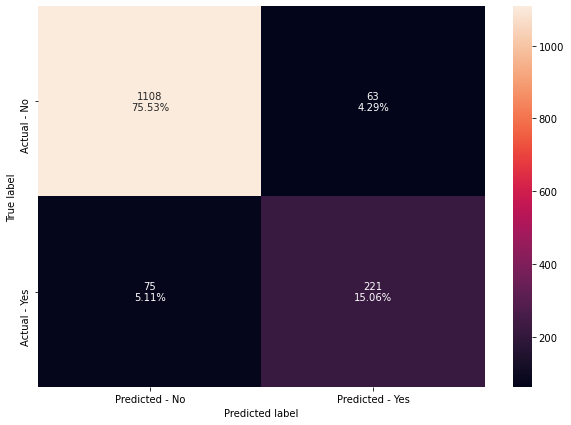

In [67]:
##Using above defined function to get accuracy, recall and precision on train and test set
dt_score=get_metrics_score(dt)
make_confusion_matrix(dt,y_test)

As expected there is overfitting in where we have 100% accuracy in training but the test data set shows lesser accuracy. Lets try to tune the model by using hyper parameters.

In [68]:
from sklearn.model_selection import GridSearchCV

In [69]:
# using Decision Tree Classifier 
dt_tuned = DecisionTreeClassifier(random_state=1,class_weight = {0:.20,1:.80})

# Grid of parameters to choose from
parameters = {
            'max_depth': np.arange(1,10),
            'criterion': ['entropy','gini'],
            'splitter': ['best','random'],
            'min_impurity_decrease': [0.000001,0.00001],
             }

# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.precision_score)

# Run the grid search
grid_obj = GridSearchCV(dt_tuned, parameters, scoring=scorer,cv=5,)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
dt_tuned = grid_obj.best_estimator_

# Fit the best algorithm to the data. 
dt_tuned.fit(X_train, y_train)

DecisionTreeClassifier(class_weight={0: 0.2, 1: 0.8}, criterion='entropy',
                       max_depth=9, min_impurity_decrease=1e-06,
                       random_state=1)

Accuracy on training set :  0.8991522946506869
Accuracy on test set :  0.8166325835037491
Recall on training set :  0.9134615384615384
Recall on test set :  0.6756756756756757
Precision on training set :  0.662020905923345
Precision on test set :  0.5361930294906166
F1 Score on training set :  0.7676767676767676
F1 Score on test set :  0.5979073243647234


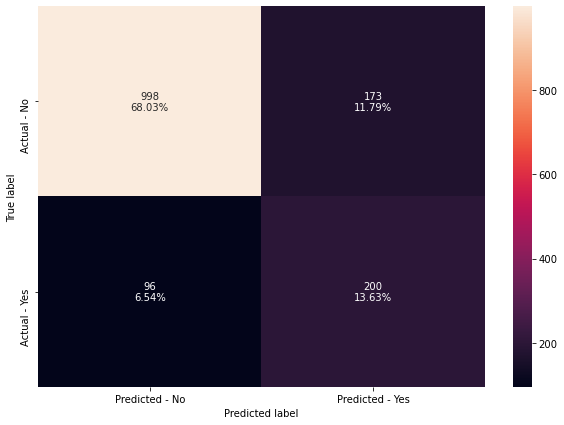

In [70]:
## getting metrics on tuned decision tree
dt_tuned_score=get_metrics_score(dt_tuned)
make_confusion_matrix(dt_tuned,y_test)

Decision Tree model, as expected overfits initially. However, after using Grid Search CV to tune the hyperparameters we see the overfitting problem is solved. 

The Precision in training is 66% and test is 53%, we will try to see if other models perform better.

### Random Forest

In [71]:
## training random forest model
rf_estimator=RandomForestClassifier(random_state=1, class_weight = {0:.20,1:.80})
rf_estimator.fit(X_train,y_train)

RandomForestClassifier(class_weight={0: 0.2, 1: 0.8}, random_state=1)

Accuracy on training set :  1.0
Accuracy on test set :  0.9188820722563054
Recall on training set :  1.0
Recall on test set :  0.625
Precision on training set :  1.0
Precision on test set :  0.9585492227979274
F1 Score on training set :  1.0
F1 Score on test set :  0.7566462167689163


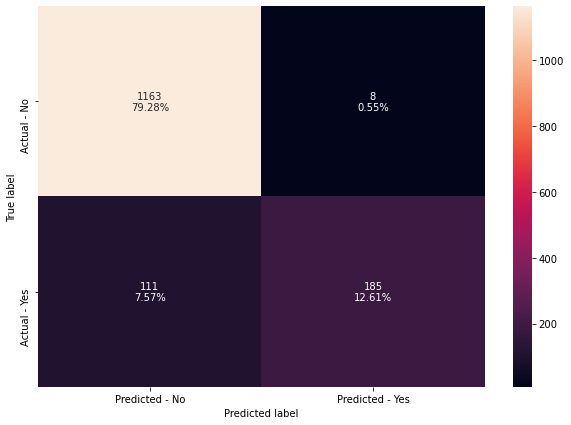

In [72]:
## getting metrics
rf_estimator_score=get_metrics_score(rf_estimator)
make_confusion_matrix(rf_estimator,y_test)

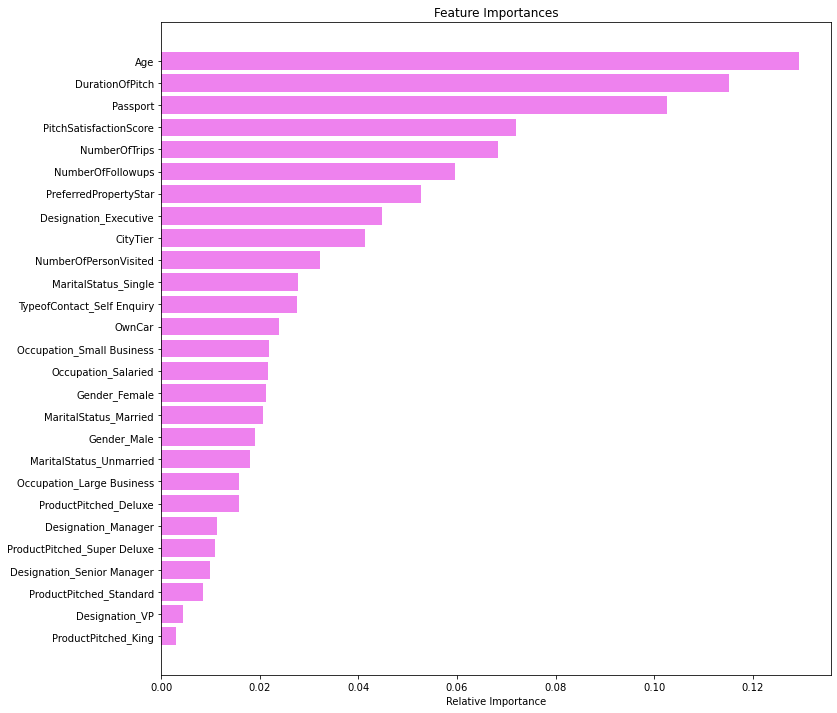

In [73]:
## plot feature according to importance to the model.
column_names = list(X.columns)
feature_names = column_names
importances = rf_estimator.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(12,12))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='violet', align='center')
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

Age, Duration of Pitch and Passport are important features for the model

In [74]:
# Hyperparameter tuning for RandomForestClassifier and training
rf_tuned = RandomForestClassifier(random_state=1,class_weight = {0:.20,1:.80})

# Grid of parameters to choose from
parameters = {  
                'max_depth':[8,10,12],
                'criterion':['gini','entropy'],
                'n_estimators': [60,80]
}

# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.precision_score)

# Run the grid search
grid_obj = GridSearchCV(rf_tuned, parameters, scoring=scorer,cv=5)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
rf_tuned = grid_obj.best_estimator_

# Fit the best algorithm to the data. 
rf_tuned.fit(X_train, y_train)

RandomForestClassifier(class_weight={0: 0.2, 1: 0.8}, max_depth=12,
                       n_estimators=60, random_state=1)

Accuracy on training set :  0.9947383805904706
Accuracy on test set :  0.912747102931152
Recall on training set :  0.9823717948717948
Recall on test set :  0.6283783783783784
Precision on training set :  0.9887096774193549
Precision on test set :  0.9117647058823529
F1 Score on training set :  0.9855305466237942
F1 Score on test set :  0.744


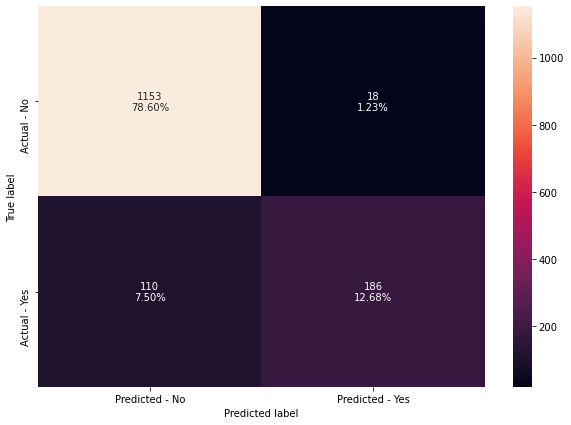

In [75]:
### getting metrics
rf_tuned_score=get_metrics_score(rf_tuned)
make_confusion_matrix(rf_tuned,y_test)

After trying various Hyperparameters, above set of parameters work best. The model is able to generalize the data well. We are able to avoid overfitting.

Precision is improved to 98% in train and 91% in Train data. Also, we are still able to maintain a good recall score as well. Giving a good balanced model.

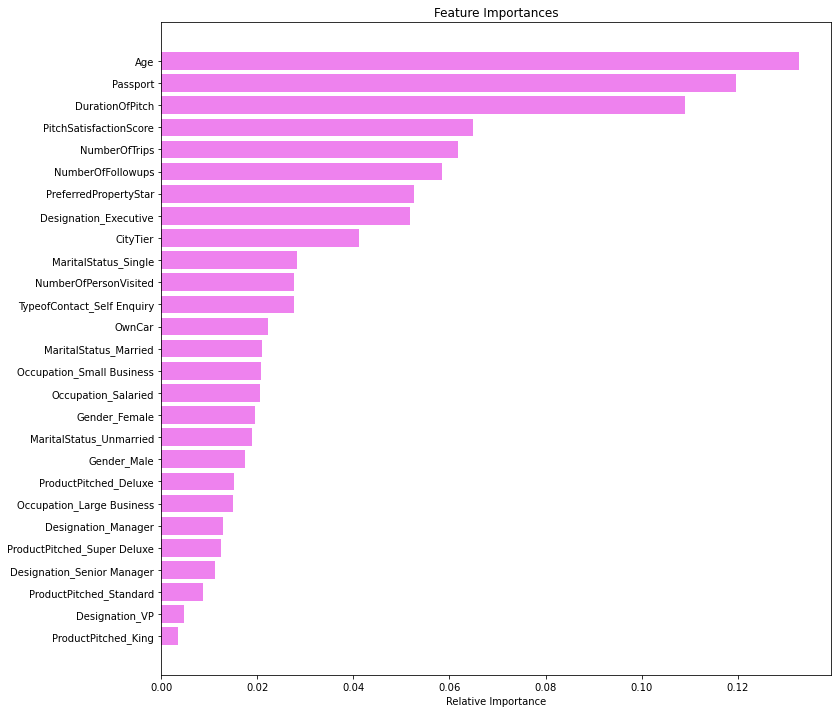

In [76]:
## plot feature according to importance to the model.
importances = rf_tuned.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(12,12))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='violet', align='center')
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

Above plot shows Age, Passport and Duration of Pitch are the most important factors in predicting if a product will be purchsed or not.

### Bagging

In [77]:
## training bagging classifier model
bg_estimator=BaggingClassifier(random_state=1)
bg_estimator.fit(X_train,y_train)

BaggingClassifier(random_state=1)

Accuracy on training set :  0.9953230049693073
Accuracy on test set :  0.9147920927062031
Recall on training set :  0.9743589743589743
Recall on test set :  0.6418918918918919
Precision on training set :  1.0
Precision on test set :  0.9090909090909091
F1 Score on training set :  0.9870129870129869
F1 Score on test set :  0.7524752475247526


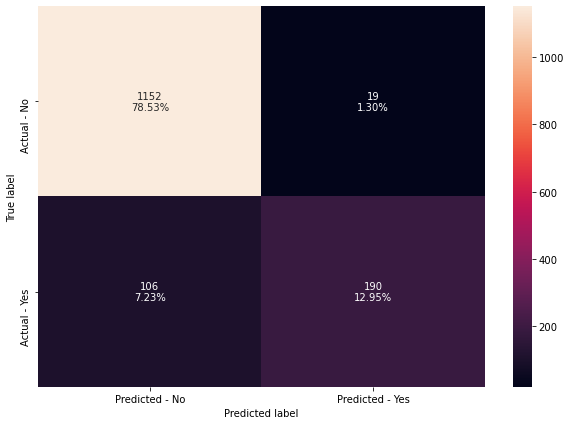

In [78]:
### getting metrics
bg_estimator_score=get_metrics_score(bg_estimator)
make_confusion_matrix(bg_estimator,y_test)

As expected there is overfitting. We will try to tune the model.

In [79]:
# training Bagging Classifier 
bg_tuned = BaggingClassifier(random_state=1)

# Grid of parameters to choose from
parameters = {  
                'max_features':[15,20,25,30],
                 'max_samples' :[20,40,60,80],
                'n_estimators': [60,80,100],
}

# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.precision_score)

# Run the grid search
grid_obj = GridSearchCV(bg_tuned, parameters, scoring=scorer,cv=5)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
bg_tuned = grid_obj.best_estimator_

# Fit the best algorithm to the data. 
bg_tuned.fit(X_train, y_train)

BaggingClassifier(max_features=20, max_samples=40, n_estimators=80,
                  random_state=1)

Accuracy on training set :  0.8275358082432037
Accuracy on test set :  0.8070892978868439
Recall on training set :  0.05608974358974359
Recall on test set :  0.05067567567567568
Precision on training set :  0.9722222222222222
Precision on test set :  0.8823529411764706
F1 Score on training set :  0.10606060606060606
F1 Score on test set :  0.09584664536741215


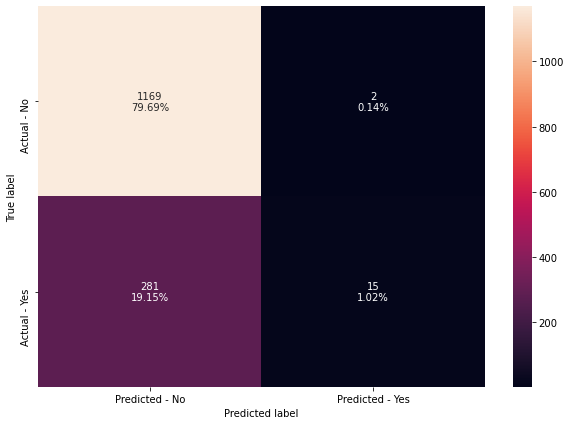

In [80]:
### getting metrics
bg_tuned_score=get_metrics_score(bg_tuned)
make_confusion_matrix(bg_tuned,y_test)

While, Bagging classifier initially overfits the data, tuned version is not able to generalize the data well. Bagging method does not seem like a good model to use for this problem.

## Boosting Models

### AdaBoost

In [81]:
ab_classfier=AdaBoostClassifier(random_state=1)
ab_classfier.fit(X_train,y_train)

AdaBoostClassifier(random_state=1)

Accuracy on training set :  0.8509207833966677
Accuracy on test set :  0.8316291751874574
Recall on training set :  0.3269230769230769
Recall on test set :  0.28716216216216217
Precision on training set :  0.6938775510204082
Precision on test set :  0.7024793388429752
F1 Score on training set :  0.4444444444444444
F1 Score on test set :  0.407673860911271


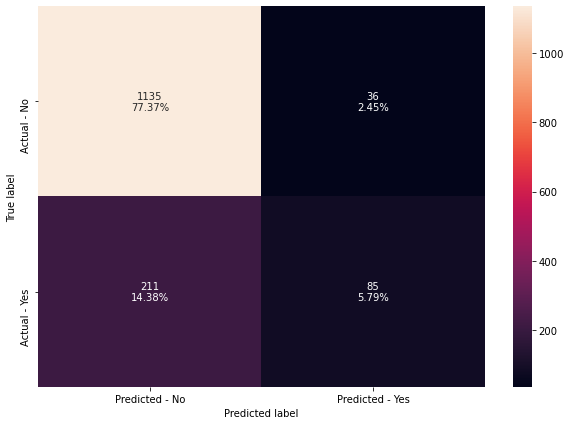

In [82]:
### getting metrics
ab_classfier_score=get_metrics_score(ab_classfier)
make_confusion_matrix(ab_classfier,y_test)

The model seems to avoid overfitting well. However, the metrics also don't look very good. We will try to tune the model and see if we get better performance.

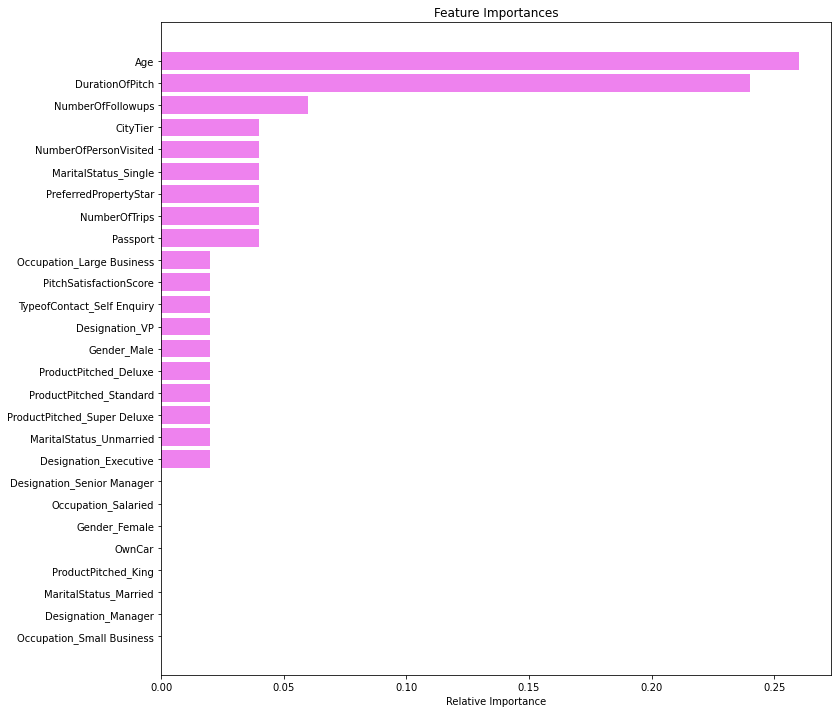

In [83]:
## plot feature according to importance to the model.
importances = ab_classfier.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(12,12))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='violet', align='center')
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

Age, Duration of Pitch seem to be important features for ADA boost model.

In [84]:
# training ADA Boost Classifier
ab_tuned = AdaBoostClassifier(random_state=1)

# Grid of parameters to choose from
parameters = {'n_estimators': np.arange(10,100,10), 
              'learning_rate': [1, 0.1, 0.5, 0.01],
              }

# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.precision_score)

# Run the grid search
grid_obj = GridSearchCV(ab_tuned, parameters, scoring=scorer,cv=5)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
ab_tuned = grid_obj.best_estimator_

# Fit the best algorithm to the data. 
ab_tuned.fit(X_train, y_train)

AdaBoostClassifier(learning_rate=0.1, n_estimators=60, random_state=1)

Accuracy on training set :  0.8313358667056416
Accuracy on test set :  0.8125426039536469
Recall on training set :  0.08333333333333333
Recall on test set :  0.0777027027027027
Precision on training set :  0.9122807017543859
Precision on test set :  0.92
F1 Score on training set :  0.1527165932452276
F1 Score on test set :  0.14330218068535824


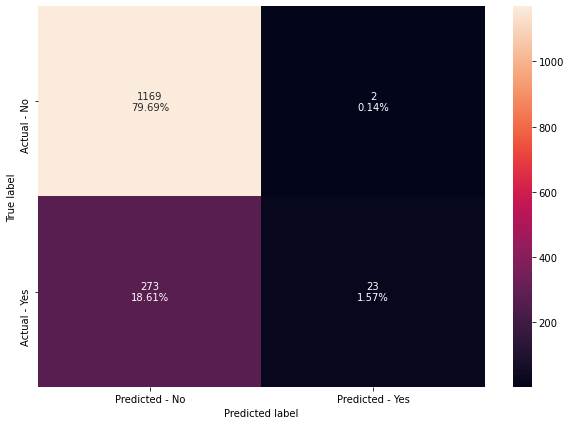

In [85]:
# getting metrics
ab_tuned_score=get_metrics_score(ab_tuned)
make_confusion_matrix(ab_tuned,y_test)

Ada Boost does not seems to generalize the data well. It does poorly with our metrics. Investigating further if other models do better.

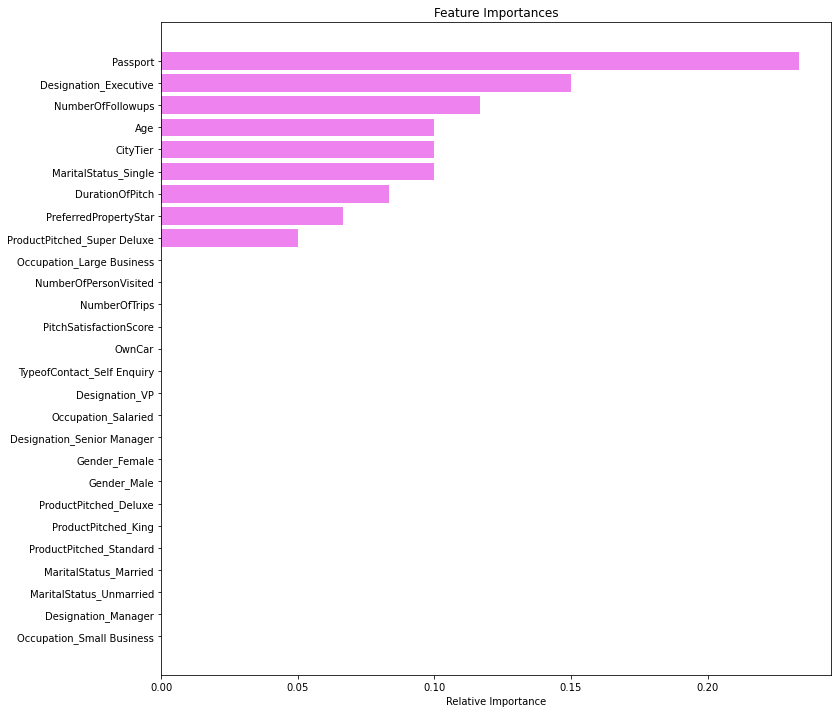

In [86]:
## plot feature according to importance to the model.
importances = ab_tuned.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(12,12))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='violet', align='center')
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

From the above plot the ada boost only seems to use few featurs and the rest are not important to the model.

### Gradient Boost

In [87]:
gb_classifier=GradientBoostingClassifier(random_state=1)
gb_classifier.fit(X_train,y_train)

GradientBoostingClassifier(random_state=1)

Accuracy on training set :  0.881613563285589
Accuracy on test set :  0.8520790729379687
Recall on training set :  0.44551282051282054
Recall on test set :  0.35135135135135137
Precision on training set :  0.8249258160237388
Precision on test set :  0.8062015503875969
F1 Score on training set :  0.578563995837669
F1 Score on test set :  0.4894117647058824


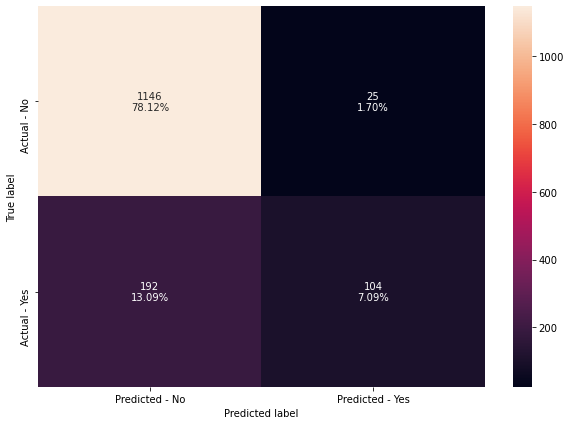

In [88]:
# getting metrics
gb_classifier_score=get_metrics_score(gb_classifier)
make_confusion_matrix(gb_classifier,y_test)

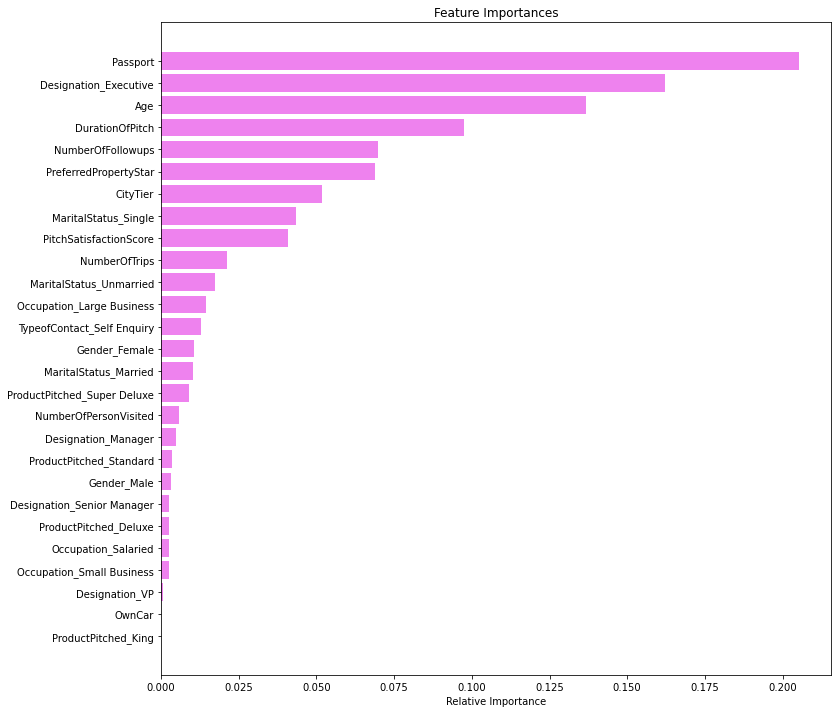

In [89]:
## plot feature according to importance to the model.
importances = gb_classifier.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(12,12))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='violet', align='center')
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

Passport, Designation and Age are important factors for model

In [90]:
# Tuning GB classifier
gb_tuned = GradientBoostingClassifier(random_state=1)

# Grid of parameters to choose from
parameters = {'n_estimators': np.arange(1,5,1), 
              'subsample':[0.7,0.8,0.9,1],
              'max_features':[0.7,0.8,0.9,1],
              'max_depth':[3,5,7,10]
              }

# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.precision_score)

# Run the grid search
grid_obj = GridSearchCV(gb_tuned, parameters, scoring=scorer,cv=5)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
gb_tuned = grid_obj.best_estimator_

# Fit the best algorithm to the data. 
gb_tuned.fit(X_train, y_train)

GradientBoostingClassifier(max_depth=10, max_features=0.8, n_estimators=4,
                           random_state=1, subsample=0.9)

Accuracy on training set :  0.819935691318328
Accuracy on test set :  0.8023176550783913
Recall on training set :  0.01282051282051282
Recall on test set :  0.02027027027027027
Precision on training set :  1.0
Precision on test set :  1.0
F1 Score on training set :  0.02531645569620253
F1 Score on test set :  0.03973509933774835


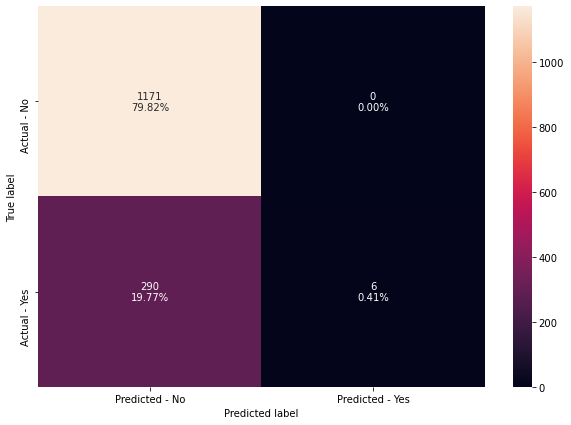

In [91]:
# getting metrics
gb_tuned_score=get_metrics_score(gb_tuned)
make_confusion_matrix(gb_tuned,y_test)

Gradient boosting also does not seem to generalize the data well.

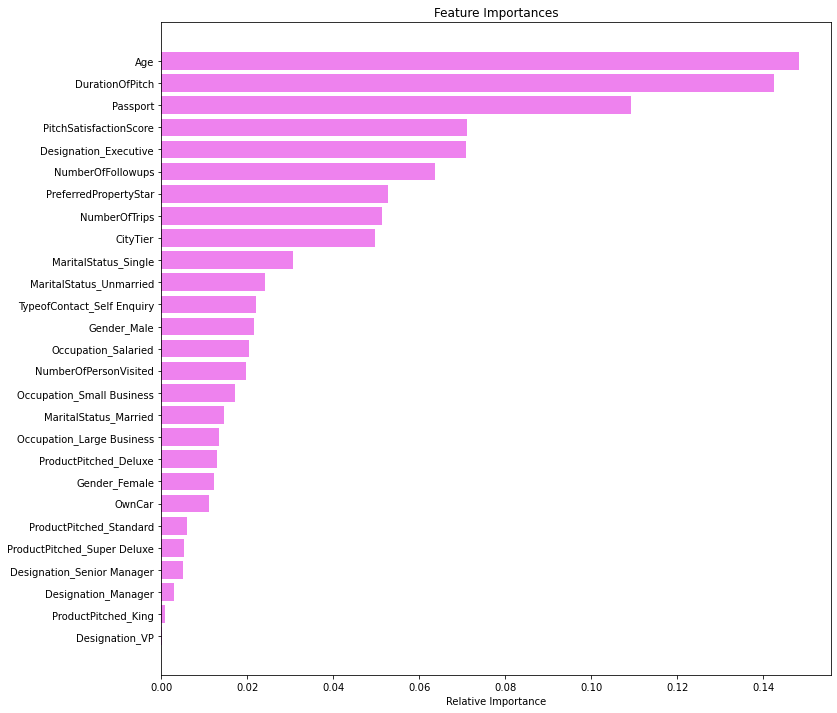

In [92]:
## plot feature according to importance to the model.
importances = gb_tuned.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(12,12))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='violet', align='center')
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

Age, duration of pitch & passport are important features.

### XG Boost

In [93]:
xgb_classifier=XGBClassifier(random_state=1,eval_metric='error')
xgb_classifier.fit(X_train,y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, eval_metric='error',
              gamma=0, gpu_id=-1, importance_type='gain',
              interaction_constraints='', learning_rate=0.300000012,
              max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=8,
              num_parallel_tree=1, random_state=1, reg_alpha=0, reg_lambda=1,
              scale_pos_weight=1, subsample=1, tree_method='exact',
              validate_parameters=1, verbosity=None)

Accuracy on training set :  0.9988307512423268
Accuracy on test set :  0.934560327198364
Recall on training set :  0.9935897435897436
Recall on test set :  0.7331081081081081
Precision on training set :  1.0
Precision on test set :  0.9273504273504274
F1 Score on training set :  0.9967845659163987
F1 Score on test set :  0.8188679245283018


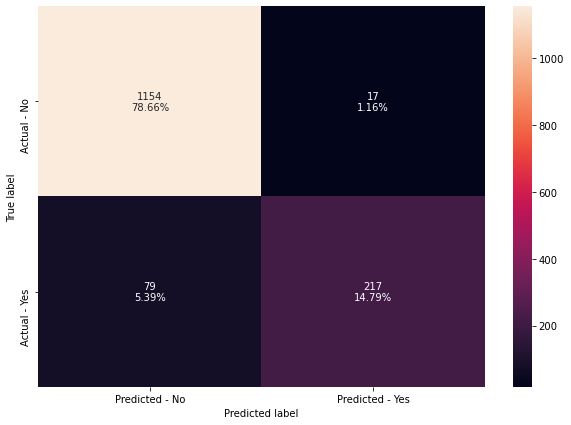

In [94]:
# getting metrics
xgb_classifier_score=get_metrics_score(xgb_classifier)
make_confusion_matrix(xgb_classifier,y_test)

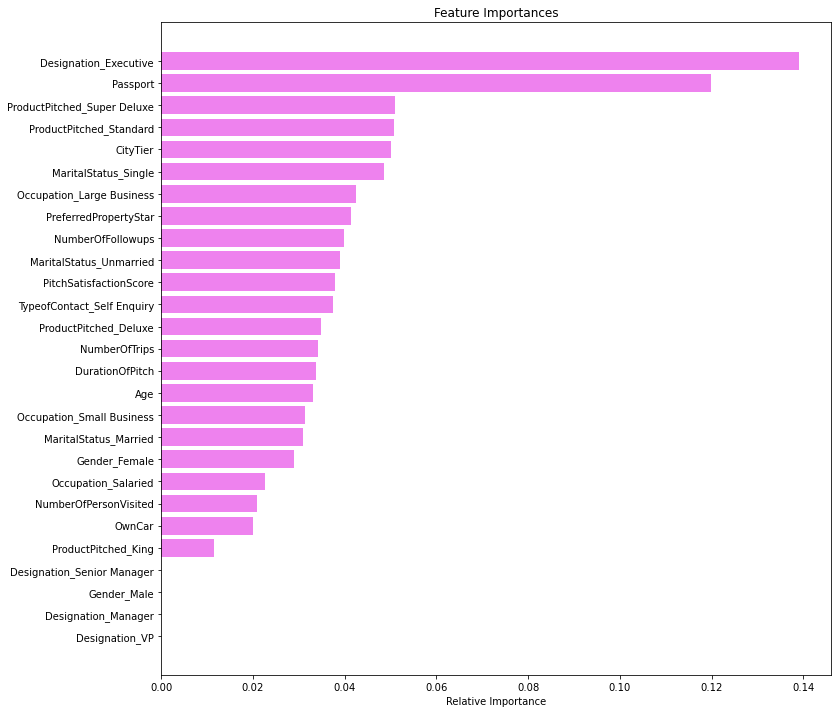

In [95]:
## plot feature according to importance to the model.
importances = xgb_classifier.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(12,12))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='violet', align='center')
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

Suprisingly, XGboost seems to give more importance to designation executive. 

In [96]:
# tuning XG Boost 
xgb_tuned = XGBClassifier(random_state=1,eval_metric='error')

# Grid of parameters to choose from
parameters = {'n_estimators': [140,145,150], 
              'subsample':[0.5,0.6],
              'colsample_bytree':[0.6,0.8],
              'colsample_bylevel':[0.7, 0.8, 0.9, 1]
              }

# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.precision_score)

# Run the grid search
grid_obj = GridSearchCV(xgb_tuned, parameters, scoring=scorer,cv=5)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
xgb_tuned = grid_obj.best_estimator_

# Fit the best algorithm to the data. 
xgb_tuned.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=0.9,
              colsample_bynode=1, colsample_bytree=0.6, eval_metric='error',
              gamma=0, gpu_id=-1, importance_type='gain',
              interaction_constraints='', learning_rate=0.300000012,
              max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=150, n_jobs=8,
              num_parallel_tree=1, random_state=1, reg_alpha=0, reg_lambda=1,
              scale_pos_weight=1, subsample=0.6, tree_method='exact',
              validate_parameters=1, verbosity=None)

Accuracy on training set :  0.9991230634317451
Accuracy on test set :  0.9113837764144512
Recall on training set :  0.9951923076923077
Recall on test set :  0.668918918918919
Precision on training set :  1.0
Precision on test set :  0.8608695652173913
F1 Score on training set :  0.9975903614457832
F1 Score on test set :  0.752851711026616


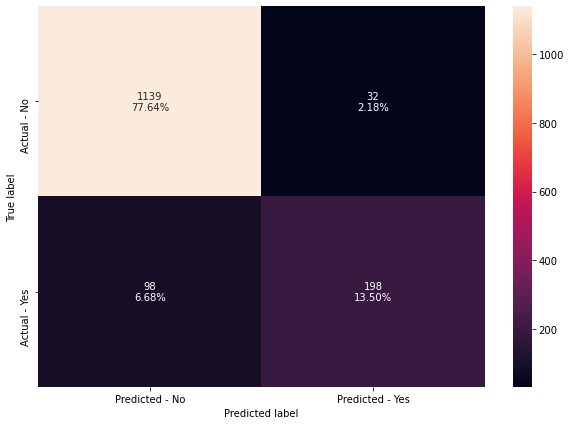

In [97]:
# getting metrics
xgb_tuned_score=get_metrics_score(xgb_tuned)
make_confusion_matrix(xgb_tuned,y_test)

XG Boost does seem to perform better when tuned. However, there still seem to be overfit when it comes to Precision.

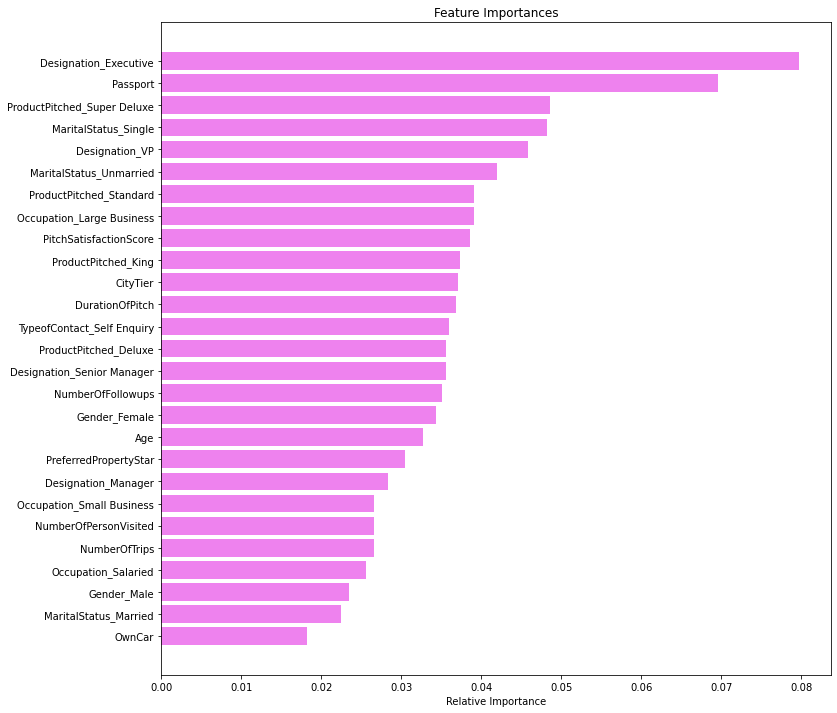

In [98]:
## plot feature according to importance to the model.
importances = xgb_tuned.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(12,12))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='violet', align='center')
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

# 

Designation, passport and product pitched seem to be important for XGBoost as well.

### building a Stacking Classifier now

In [99]:
## Using following base models, based on their performance.
estimators=[('Decision Tree', dt_tuned),('Random Forest', rf_tuned),
           ('Bagging Classifier', bg_estimator)]
final_estimator=XGBClassifier(random_state=1,eval_metric='error')

In [100]:
stacking_classifier=StackingClassifier(estimators=estimators, final_estimator=final_estimator,cv=5)
stacking_classifier.fit(X_train,y_train,)

StackingClassifier(cv=5,
                   estimators=[('Decision Tree',
                                DecisionTreeClassifier(class_weight={0: 0.2,
                                                                     1: 0.8},
                                                       criterion='entropy',
                                                       max_depth=9,
                                                       min_impurity_decrease=1e-06,
                                                       random_state=1)),
                               ('Random Forest',
                                RandomForestClassifier(class_weight={0: 0.2,
                                                                     1: 0.8},
                                                       max_depth=12,
                                                       n_estimators=60,
                                                       random_state=1)),
                               ('Bagging Classifier'

Accuracy on training set :  0.9915229465068693
Accuracy on test set :  0.9256987048398091
Recall on training set :  0.9967948717948718
Recall on test set :  0.7601351351351351
Precision on training set :  0.9583975346687211
Precision on test set :  0.8555133079847909
F1 Score on training set :  0.9772191673212883
F1 Score on test set :  0.8050089445438283


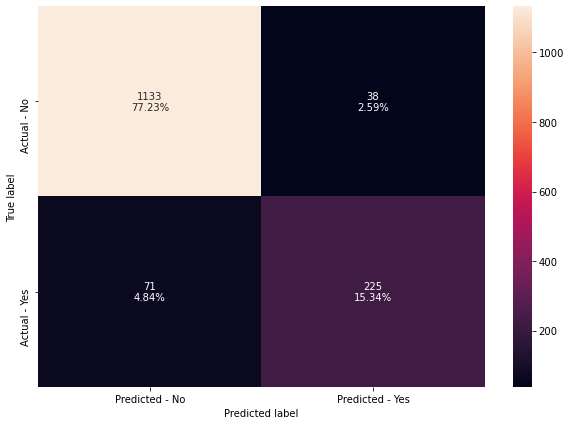

In [101]:
# getting metrics
stacking_classifier_score=get_metrics_score(stacking_classifier)
make_confusion_matrix(stacking_classifier,y_test)

Stacking Classifier seem to do better than all the other models. We do not have overfitting and also we are able to maintain a high Precision score. Not only that the model does well with Recall as well. Thus giving a very balanced model that can help achieve business objective.

In [102]:
#Creating Dataframe to get and compare metrics for all the models trained
# defining list of models
models = [dt,dt_tuned,rf_estimator,rf_tuned,bg_estimator,bg_tuned,
          ab_classfier,ab_tuned,gb_classifier,gb_tuned,xgb_classifier,xgb_tuned,stacking_classifier]

# defining empty lists to add train and test results
Accuracy_Train = []
Accuracy_Test = []
Recall_Train = []
Recall_Test = []
Precision_Train = []
Precision_Test = []
F1_Train = []
F1_Test = []


# looping through all the models to get the metrics
for model in models:
    j = get_metrics_score(model,False)
    Accuracy_Train.append(j[0])
    Accuracy_Test.append(j[1])
    Recall_Train.append(j[2])
    Recall_Test.append(j[3])
    Precision_Train.append(j[4])
    Precision_Test.append(j[5])
    F1_Train.append(j[6])
    F1_Test.append(j[7])

In [103]:
comparison_frame = pd.DataFrame({'Model':['dt','dt_tuned','rf_estimator','rf_tuned','bg_estimator','bg_tuned',
          'ab_classfier','ab_tuned','gb_classifier','gb_tuned','xgb_classifier','xgb_tuned','stacking_classifier'],'Accuracy_Train': Accuracy_Train,'Accuracy_Test': Accuracy_Test,
                                          'Recall_Train':Recall_Train,'Recall_Test':Recall_Test,
                                'Precision_Train':Precision_Train,'Precision_Test':Precision_Test,
                                'F1_Train':F1_Train,'F1_Test':F1_Test}) 
comparison_frame

,Model,Accuracy_Train,Accuracy_Test,Recall_Train,Recall_Test,Precision_Train,Precision_Test,F1_Train,F1_Test
0,dt,1.000000,0.905930,1.000000,0.746622,1.000000,0.778169,1.000000,0.762069
1,dt_tuned,0.899152,0.816633,0.913462,0.675676,0.662021,0.536193,0.767677,0.597907
2,rf_estimator,1.000000,0.918882,1.000000,0.625000,1.000000,0.958549,1.000000,0.756646
3,rf_tuned,0.994738,0.912747,0.982372,0.628378,0.988710,0.911765,0.985531,0.744000
4,bg_estimator,0.995323,0.914792,0.974359,0.641892,1.000000,0.909091,0.987013,0.752475
5,bg_tuned,0.827536,0.807089,0.056090,0.050676,0.972222,0.882353,0.106061,0.095847
6,ab_classfier,0.850921,0.831629,0.326923,0.287162,0.693878,0.702479,0.444444,0.407674
7,ab_tuned,0.831336,0.812543,0.083333,0.077703,0.912281,0.920000,0.152717,0.143302
8,gb_classifier,0.881614,0.852079,0.445513,0.351351,0.824926,0.806202,0.578564,0.489412
9,gb_tuned,0.819936,0.802318,0.012821,0.020270,1.000000,1.000000,0.025316,0.039735


Looking at the results above, we see following models did well
* Random Forest Tuned (rf_tuned) - High precision score, respectable recall and F1 score.
* XG Boost (xgb_classifier) - High precision and recall. But some overfiting in terms of precision.
* Stacking Classifier (stacking_classifier) - Very balanced model. Good Precision Score (as expected by business to lower marketing costs), maintains a good recall, avoids overfitting and gives a good F1 Score as well. This model will serve the business purpose well. Lowers and targets marketing expenses to customers most likely to buy the product.

### Business Recommendation

* The above model can be used to predict before hand, the number of customer who are likely to buy a new travel package. This can help business to plan the marketing efforts accordingly. It can also help decide the staffing level needed for marketing team.

* It seems customer in age group of 40 to 60 are more likely to buy Deluxe, King and Standard travel packages. While we do not have the cost information on the travel packages. This can help business determine what customer group to target based on the cost of travel package being introduced.

* As the duration of pitch increased the likely hood of customer buying a packaged increase for all but 'King' package. This means the effort spent on trying to convince a customer to buy travel package are well rewarded. More investment/ideas can be made to convert more customers.

* Customer's who purchased Deluxe and SuperDeluxe seem to have more Number of Trips made. A hypothesis can be made that these returning customers are more likely to return and buy new travel packages.